### settings.py

In [1]:
# Customizable settings

''' RECURRING VARIABLES '''

import numpy as np
import nibabel as nib
import ciftools_FA as ct
import pandas as pd

# directory containing subdirectories named fter subject IDs that contain the timeseries and surface files
root_dir = "/home/fralberti/Data/HCP_S1200"
# directory where all intermediate files and the final output will be saved
output_dir = "/home/fralberti/Documents/BlackBox/Prj_Gradient-variability/Results_retest"
# path to cognitive data
cog_path = f'{root_dir}/unrestricted_fralberti_4_8_2022_8_22_23.csv'
# .txt containing IDs of subjects to include in the analysis
f = open(f'{root_dir}/Subjects/subj_IDs_578.txt', 'r')
subj_id = np.array(f.read().splitlines(), dtype='int32')
# group name
group = '03'

# Schaefer atlas to use for analyses
lbl_N = 400
nw_N = 7
networks_txt = f'/home/fralberti/Data/Shaefer2018_HCP/Schaefer2018_{lbl_N}Parcels_{nw_N}Networks_order_info.txt'
networks = nib.load(f'/home/fralberti/Data/Shaefer2018_HCP/Schaefer2018_{lbl_N}Parcels_{nw_N}Networks_order.dlabel.nii')
NW_tbl = ct.agg_networks(networks, networks, func=np.median, by_hemisphere=False, label_tbl=True)[1]
nw_name = NW_tbl.groupby('name').agg(np.median).sort_values('network').index.to_list()[1:]

# number of jobs for parallelized operations
nj = -1


subj_dir = f"{root_dir}/Subjects/"
gcca_dir = f"{output_dir}/GCCA"

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
/tmp/ipykernel_50536/158685812.py:28: FutureWarning: The operation <function median at 0x7efcf0123790> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  nw_name = NW_tbl.groupby('name').agg(np.median).sort_values('network').index.to_list()[1:]


### cifti_to_npy.py

In [24]:
# Import dependencies

import os
import nibabel as nib
import numpy as np
import ciftools_FA as ct
from joblib import Parallel, delayed
from settings import * 
#----------------------------------------------------------------------------------------------------

''' Save vertex/parcel/network-level GCCA (individual and group median) from dscalar.nii to .npy arrays'''

template = nib.load(f"{group_dir}/S1200.sulc_MSMAll.32k_fs_LR.dscalar.nii")
# Write function to run in parallel
def fun(subj, output_dir, nw_N, lbl_N):

    # Save individual gradients to cifti
    out_grad = f"{gcca_dir}/{subj}.GCCA.32k_fs_LR.dscalar.nii"
    grad = np.load(f"{gcca_dir}/{subj}.GCCA.npy")
    ct.save_dscalar(grad, template, out_grad, names=['Gradient_1', 'Gradient_2', 'Gradient_3'])

    # Aggregate gradients by parcels and networks
    grad = nib.load(out_grad)
    NW_df, NW_tbl = ct.agg_networks(grad, networks, func=np.median, by_hemisphere=False, label_tbl=True)
    NW_df.iloc[0, :] = 0
    NW_tbl.iloc[0, :] = 0
    lbl_df = ct.agg_labels(grad, networks, func=np.median)    
    
    # Append subject's vertex, label, and network-level gradients to group list (for SD)
    grad_NW = NW_df.T.values
    grad_lbl = lbl_df.T.values
    grad_vtx = np.asarray(grad.get_fdata())
    
    # Save median individual median gradient of parcels and networks
    np.save(f'{output_dir}/{subj}.gcca.{nw_N}NWs', NW_df) 
    np.save(f'{output_dir}/{subj}.gcca.{lbl_N}Parc', lbl_df)
    
    return grad_NW, grad_lbl, grad_vtx
    
#--------------------------------------------------------------------------------------------------

# Create directory
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

r = Parallel(n_jobs=nj)(delayed(fun)(subj, gcca_dir, nw_N, lbl_N) for subj in subj_id)
# unpack output
grad_NW, grad_lbl, grad_vtx = zip(*r)

# Save parcels' and networks' median gradient of all subjects
np.save(f'{gcca_dir}/{group}.gcca.{nw_N}NWs', np.array(grad_NW)) 
np.save(f'{gcca_dir}/{group}.gcca.{lbl_N}Parc', np.array(grad_lbl))
np.save(f'{gcca_dir}/{group}.gcca.32k_fs_LR', np.array(grad_vtx)) 

#--------------------------------------------------------------------------------------------------

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


[[196.  67.  47. ... 339. 339. 339.]]
[[196.  67.  47. ... 339. 339. 339.]]
[[196.  67.  47. ... 339. 339. 339.]]
[[196.  67.  47. ... 339. 339. 339.]]
[[196.  67.  47. ... 339. 339. 339.]]
[[196.  67.  47. ... 339. 339. 339.]]
[[196.  67.  47. ... 339. 339. 339.]]
[[196.  67.  47. ... 339. 339. 339.]]
[[196.  67.  47. ... 339. 339. 339.]]
[[196.  67.  47. ... 339. 339. 339.]]
[[196.  67.  47. ... 339. 339. 339.]]
[[196.  67.  47. ... 339. 339. 339.]]
[[196.  67.  47. ... 339. 339. 339.]]
[[196.  67.  47. ... 339. 339. 339.]]
[[196.  67.  47. ... 339. 339. 339.]]
[[196.  67.  47. ... 339. 339. 339.]]
[[196.  67.  47. ... 339. 339. 339.]]
[[196.  67.  47. ... 339. 339. 339.]]
[[196.  67.  47. ... 339. 339. 339.]]
[[196.  67.  47. ... 339. 339. 339.]]
[[196.  67.  47. ... 339. 339. 339.]]
[[196.  67.  47. ... 339. 339. 339.]]
[[196.  67.  47. ... 339. 339. 339.]]
[[196.  67.  47. ... 339. 339. 339.]]
[[196.  67.  47. ... 339. 339. 339.]]
[[196.  67.  47. ... 339. 339. 339.]]
[[196.  67. 

### interindividual_dispersion.py

In [11]:
# Import dependencies

import nibabel as nib
import numpy as np
import ciftools_FA as ct
from settings import *
#----------------------------------------------------------------------------------------------------


''' Calculate dispersion of connectivity in 3D gradient space'''

gcca_nw = np.load(f'{gcca_dir}/{group}.gcca.{nw_N}NWs.npy')
gcca_parc = np.load(f'{gcca_dir}/{group}.gcca.{lbl_N}Parc.npy')
gcca_vtx = np.load(f'{gcca_dir}/{group}.gcca.32k_fs_LR.npy')

# AVVERAGE SQUARED DISTANCE from group centroid
def gcca_dispersion(gcca):
    centroids = gcca.mean(axis=0)
    squares = np.square(gcca - centroids)
    sum_squares = squares[:, :2, :].sum(axis=1)
    distance = np.sqrt(sum_squares)
    avg_distance2 = np.square(distance).sum(axis=0) / distance.shape[0]
    avg_components2 = squares.sum(axis=0) / squares.shape[0]
    return np.vstack([avg_distance2, avg_components2])

dispersion_nw = gcca_dispersion(gcca_nw)
dispersion_parc = gcca_dispersion(gcca_parc)
dispersion_vtx = gcca_dispersion(gcca_vtx)


np.save(f'{output_dir}/{group}.gcca_dispersion.{nw_N}NWs', dispersion_nw)
np.save(f'{output_dir}/{group}.gcca_dispersion.{lbl_N}Parc', dispersion_parc)
np.save(f'{output_dir}/{group}.gcca_dispersion.32k_fs_LR', dispersion_vtx)
#----------------------------------------------------------------------------------------------------


''' Save dscalar files'''

# Load gcca data
gcca_nw = np.load(f'{gcca_dir}/{group}.gcca.{nw_N}NWs.npy')
gcca_parc = np.load(f'{gcca_dir}/{group}.gcca.{lbl_N}Parc.npy')
gcca_vtx = np.load(f'{gcca_dir}/{group}.gcca.32k_fs_LR.npy')

# Get vertex network labels
_, lbl_tbl = ct.agg_networks(networks, networks, by_hemisphere=False, label_tbl=True)
vtx_nw = lbl_tbl.set_index('label').loc[networks.get_fdata().squeeze().astype('int32'), 'network'].values
template = nib.load(f'{gcca_dir}/{subj_id[0]}.GCCA.32k_fs_LR.dscalar.nii')

# Vertex - gradient median
scalars = np.median(gcca_vtx, axis=0)
out = f'{output_dir}/{group}.gcca.32k_fs_LR.dscalar.nii'
ct.save_dscalar(scalars, template, out, names=['Gradient_1', 'Gradient_2', 'Gradient_3'])

# Parcel - gradient median
scalars = np.median(gcca_parc[:, :, networks.get_fdata().squeeze().astype('int32')], axis=0)
out = f'{output_dir}/{group}.gcca.{lbl_N}Parc.32k_fs_LR.dscalar.nii'
ct.save_dscalar(scalars, networks, out, names=['Gradient 1', 'Gradient 2', 'Gradient 3'])

# Network - gradient median
scalars = np.median(gcca_nw[:, :, vtx_nw], axis=0)
out = f'{output_dir}/{group}.gcca.{lbl_N}Parc_{nw_N}NWs.32k_fs_LR.dscalar.nii'
ct.save_dscalar(scalars, networks, out, names=['Gradient_1', 'Gradient_2', 'Gradient_3'])


dispersion_nw = np.load(f'{output_dir}/{group}.gcca_dispersion.{nw_N}NWs.npy')
dispersion_parc = np.load(f'{output_dir}/{group}.gcca_dispersion.{lbl_N}Parc.npy')
dispersion_vtx = np.load(f'{output_dir}/{group}.gcca_dispersion.32k_fs_LR.npy')

# Vertex - dispersion 
scalars = dispersion_vtx
out = f'{output_dir}/{group}.gcca_dispersion.32k_fs_LR.dscalar.nii'
ct.save_dscalar(scalars, template, out, names=['All', 'Gradient_1', 'Gradient_2', 'Gradient_3'])

# Parcel - dispersion 
scalars = dispersion_parc[:, networks.get_fdata().squeeze().astype('int32')]
out = f'{output_dir}/{group}.gcca_dispersion.{lbl_N}Parc.32k_fs_LR.dscalar.nii'
ct.save_dscalar(scalars, networks, out, names=['All', 'Gradient_1', 'Gradient_2', 'Gradient_3'])

# Network - dispersion 
scalars = dispersion_nw[:, vtx_nw]
out = f'{output_dir}/{group}.gcca_dispersion.{lbl_N}Parc_{nw_N}NWs.32k_fs_LR.dscalar.nii'
ct.save_dscalar(scalars, networks, out, names=['All', 'Gradient_1', 'Gradient_2', 'Gradient_3'])


FileNotFoundError: [Errno 2] No such file or directory: '/home/fralberti/Data/HCP_1200/GCCA_338/338.gcca.7NWs.npy'

### variability_clusters.py

In [ ]:
# Import dependencies

import os
import nibabel as nib
import numpy as np
from scipy import stats
import pandas as pd
import ciftools_FA as ct
import statsmodels.api as sm
import matplotlib.pyplot as plt
import subprocess as sp
from joblib import Parallel, delayed
# from settings import root_dir, output_dir, subj_id, group, lbl_N, nw_N, networks, networks_txt, NW_tbl, nw_name, nj
subj_dir = f"{root_dir}/Subjects/"
gcca_dir = f"{output_dir}/GCCA"
#----------------------------------------------------------------------------------------------------



''' Generate clusters of highest inter-individual variability '''

# Find variance clusters
dscalar = f"{output_dir}/{group}.gcca_dispersion.32k_fs_LR.dscalar.nii"
percentile = 95
clusters = []
for g_tmp in range(4):
    thr = np.percentile(np.load(f"{output_dir}/{group}.gcca_dispersion.32k_fs_LR.npy"), percentile, axis=1)[g_tmp]
    srf_min = 200
    vol_min = 1
    out = f"{output_dir}/{group}.gcca_disp_clusters.32k_fs_LR.dscalar.nii"
    L_srf = f"{root_dir}/HCP_S1200_GroupAvg_v1/S1200.L.midthickness_MSMAll.32k_fs_LR.surf.gii"
    R_srf = f"{root_dir}/HCP_S1200_GroupAvg_v1/S1200.R.midthickness_MSMAll.32k_fs_LR.surf.gii"

    sp.run(f"wb_command -cifti-find-clusters {dscalar} {thr} {srf_min} {thr} {vol_min} COLUMN {out} -left-surface {L_srf} -right-surface {R_srf}", shell=True)

    clusters_g = nib.load(f"{output_dir}/{group}.gcca_disp_clusters.32k_fs_LR.dscalar.nii").get_fdata()[g_tmp, :]
    clusters.append(clusters_g)

clusters = np.asarray(clusters)
clusters = stats.rankdata(clusters, axis=1, method='dense') - 1

ct.save_dscalar(clusters, nib.load(dscalar), out, names=['All', 'Gradient_1', 'Gradient_2', 'Gradient_3'])
#----------------------------------------------------------------------------------------------------



''' Save clusters as dlabel.nii file '''

clusters = nib.load(f"{output_dir}/{group}.gcca_disp_clusters.32k_fs_LR.dscalar.nii")


labels_path = f"{output_dir}/{group}.gcca_disp_clusters.32k_fs_LR.dscalar.nii"
labels_array = nib.load(labels_path)
lbl_txt =  f'{output_dir}/{group}.gcca_disp_clusters_info.txt'
new_dlabel = f'{output_dir}/{group}.gcca_disp_clusters_info.dlabel.txt'


labels = np.unique(clusters.get_fdata()).astype('int32')
new_labels = []
colors = np.round(plt.cm.Dark2(range(len(labels)-1))* 255).astype('int32').astype('str')
for lbl in labels[labels!=0]:
    new_labels.append(f"Disp_cluster_{lbl}")
    new_labels.append(' '.join(np.hstack([lbl, colors[lbl-1,:]])))
    

with open(lbl_txt, 'w') as f:
    f.write('\n'.join(new_labels))
    
    
# Create dlabel file
new_dlabel = f'{output_dir}/{group}.gcca_disp_clusters.32k_fs_LR.dlabel.nii'
cmd = f'wb_command -cifti-label-import {labels_path} {lbl_txt} {new_dlabel} -discard-others'
sp.run(cmd, shell=True)

#----------------------------------------------------------------------------------------------------



''' Add dispersion cluster to Schaefer atlas '''

clusters = nib.load(f"{output_dir}/{group}.gcca_disp_clusters.32k_fs_LR.dscalar.nii")

# allign network and cluster maps
shared_l = np.isin(ct.struct_info('CIFTI_STRUCTURE_CORTEX_LEFT', networks)[2], ct.struct_info('CIFTI_STRUCTURE_CORTEX_LEFT', clusters)[2])
shared_r = np.isin(ct.struct_info('CIFTI_STRUCTURE_CORTEX_RIGHT', networks)[2], ct.struct_info('CIFTI_STRUCTURE_CORTEX_RIGHT', clusters)[2])
shared_vv = np.hstack([shared_l, shared_r])

clusters = clusters.get_fdata()[0].astype('int32')
clusters[clusters != 0] += 1000    ### add 1000 to differentiate from original parcels
cluster_N = len(np.unique(clusters))
parcels = networks.get_fdata()[0, shared_vv].astype('int32')
parcels[clusters!=0] = clusters[clusters!=0]
removed = np.unique(networks.get_fdata()[0, shared_vv].astype('int32'))[~np.isin(np.unique(networks.get_fdata()[0, shared_vv].astype('int32')), parcels)]

# save dscalar with new parcellation
out = f'{output_dir}/{group}.dispROIs_Schaefer2018_{lbl_N}Parcels_{nw_N}Networks.dscalar.nii'
template = nib.load(f"{output_dir}/{group}.gcca_disp_clusters.32k_fs_LR.dscalar.nii")
ct.save_dscalar(parcels, template, out)


# Create list of new parcels and colors
new_labels = []
names = [f"{nw_N}Networks_LH_ROI_{i}" for i in range(1,cluster_N)]
colors = np.round(plt.cm.Dark2(range(np.unique(clusters[clusters!=0]).size))* 255).astype('int32').astype('str')
for i, lbl in enumerate(np.unique(clusters[clusters!=0])):
    new_labels.append(names[i]+'\n')
    new_labels.append(' '.join(np.hstack([lbl, colors[i,:], '\n'])))
   
    
# Save new label-list-file with added parcels
orig_lbl_txt = networks_txt
with open(orig_lbl_txt, 'r+') as f:
    lines = f.readlines()
    lines.extend(new_labels)
    f.close()

for i in range(1, len(lines), 2):
    if i > len(lines):
        break
    label = int(lines[i].split()[0])
    if label not in parcels:
        del lines[i], lines[i-1]

new_lbl_txt = f'{output_dir}/{group}.dispROIs_Schaefer2018_{lbl_N}Parcels_{nw_N}Networks.txt'
with open(new_lbl_txt, 'w') as f:
    f.truncate(0)
    f.write(''.join(lines))
    f.close()
    
# Create dlabel file
new_dlabel = f'{output_dir}/{group}.dispROIs_Schaefer2018_{lbl_N}Parcels_{nw_N}Networks.dlabel.nii'
cmd = f'wb_command -cifti-label-import {out} {new_lbl_txt} {new_dlabel}'
sp.run(cmd, shell=True)

#----------------------------------------------------------------------------------------------------



''' Generate previous tables and images using the integrated parcellation '''

joint_atlas = nib.load(f'{output_dir}/{group}.dispROIs_Schaefer2018_{lbl_N}Parcels_{nw_N}Networks.dlabel.nii')
labels = np.unique(joint_atlas.get_fdata()).astype('int32')

# Parcel - gradient median
gcca_parc = []
for subj in subj_id:
    grad = nib.load(f'{subj_dir}/{subj}/Analysis/{subj}.GCCA_525.32k_fs_LR.dscalar.nii')
    lbl_df = ct.agg_labels(grad, joint_atlas, func=np.median)
    gcca_parc.append(lbl_df.T.values)
    np.save(f'{output_dir}/{subj}.gcca.dispROIs_{lbl_N}Parc', lbl_df)
    
gcca_parc = np.array(gcca_parc)
np.save(f'{output_dir}/{group}.gcca.dispROIs_{lbl_N}Parc', gcca_parc)

parc_idx = stats.rankdata(joint_atlas.get_fdata().squeeze(), method='dense') - 1
scalars = np.median(gcca_parc[:, :, parc_idx], axis=0)
out = f'{output_dir}/{group}.gcca.dispROIs_{lbl_N}Parc.32k_fs_LR.dscalar.nii'
ct.save_dscalar(scalars, joint_atlas, out, names=['Gradient 1', 'Gradient 2', 'Gradient 3'])


# Parcel - dispersion 
dispersion_vtx = nib.load(f'{output_dir}/{group}.gcca_dispersion.32k_fs_LR.dscalar.nii')
dispersion_parc = ct.agg_labels(dispersion_vtx, joint_atlas, func=np.median)
np.save(f'{output_dir}/{group}.gcca_dispersion.dispROIs_{lbl_N}Parc', dispersion_parc)

scalars = joint_atlas.get_fdata().copy()

for lbl, val in dispersion_parc.iterrows():
    scalars[:,scalars[0]==lbl] = val.iloc[0]
    
out = f'{output_dir}/{group}.gcca_dispersion.dispROIs_{lbl_N}Parc.32k_fs_LR.dscalar.nii'
ct.save_dscalar(scalars, joint_atlas, out, names=['All'])



### generate_csv

In [26]:
# Import dependencies

import os
import nibabel as nib
import numpy as np
from scipy import stats
import pandas as pd
import ciftools_FA as ct
import statsmodels.api as sm
import matplotlib.pyplot as plt
import subprocess as sp
from joblib import Parallel, delayed
from settings import root_dir, output_dir, subj_id, cog_path, group, lbl_N, nw_N, networks, networks_txt, NW_tbl, nw_name, nj
subj_dir = f"{root_dir}/Subjects/"
gcca_dir = f"{output_dir}/GCCA"
#----------------------------------------------------------------------------------------------------



''' Generate table with vertex affiliations, gradients, and dispersion measures '''

grad_SD = nib.load(f'{output_dir}/{group}.gcca_dispersion.32k_fs_LR.dscalar.nii')
cifti_59k = nib.load(f'{subj_dir}/{subj_id[0]}/Analysis/{subj_id[0]}.GCCA_525.32k_fs_LR.dscalar.nii')

# Create parcel label array
parc_lbl = []
vv = []
hemi = []
for struct in ['CIFTI_STRUCTURE_CORTEX_LEFT', 'CIFTI_STRUCTURE_CORTEX_RIGHT']:
    NWos, NWn, NWvv = ct.struct_info(struct, networks)
    Gos, Gn, Gvv = ct.struct_info(struct, cifti_59k)
    shared_vv = np.isin(NWvv, Gvv)
    parc_lbl.extend(networks.get_fdata()[0, NWos : NWos + NWn][shared_vv])
    vv.extend(NWvv[shared_vv])
    h = (0 if struct=='CIFTI_STRUCTURE_CORTEX_LEFT' else 1)
    hemi.extend(np.repeat(h, Gn))


# Create network label array
parc_to_NW = ct.agg_networks(networks, networks, func='mean', by_hemisphere=False, label_tbl=True)[1]
NW_lbl = parc_to_NW.set_index('label').loc[parc_lbl, 'network'].values

# Create dataframe for tests
disp_df = pd.DataFrame(np.vstack([vv, hemi, parc_lbl, NW_lbl, grad_SD.get_fdata()]).T, columns = ['Vtx', 'Hemi', 'Parc', 'NW', 'Disp_tot', 'Disp_G1', 'Disp_G2', 'Disp_G3'])

# Add ROIs labels
clusters = nib.load(f"{output_dir}/{group}.gcca_disp_clusters.32k_fs_LR.dscalar.nii").get_fdata().T
disp_df[['DispROI_tot', 'DispROI_G1', 'DispROI_G2', 'DispROI_G3']] = clusters


disp_df.to_csv(f'{output_dir}/{group}.gcca_dispersion.csv', index=False)
print(disp_df.head())

#----------------------------------------------------------------------------------------------------
'''Compute individual average framewise displacement'''

radius = 50.0
rest_FD = []
for subj in subj_id:
    # Compute FD of traslations
    runs = ["REST1_LR", "REST1_RL", "REST2_LR", "REST2_RL"]
    runwise_FD = np.zeros(len(runs))
    for i, run in enumerate(runs):
        traslations = np.loadtxt(f"{subj_dir}/{subj}/MNINonLinear/Results/rfMRI_{run}/Movement_Regressors.txt",
                                       usecols=[0,1,2], dtype="float64")
        translation_deltas = np.abs(traslations).sum(axis=1)

        rotations = np.loadtxt(f"{subj_dir}/{subj}/MNINonLinear/Results/rfMRI_{run}/Movement_Regressors.txt",
                                       usecols=[3,4,5], dtype="float64")
        rotations_deltas = (abs(rotations) / 360) * (2 * np.pi * radius)
        rotations_deltas = rotations_deltas.sum(axis=1)

        FD = translation_deltas + rotations_deltas
        runwise_FD[i] = FD.sum()
    
    rest_FD.append(np.mean(runwise_FD))

#----------------------------------------------------------------------------------------------------



''' Generate table with subject data for analyses '''

# Load cognitive scores
cog_df = pd.read_csv(cog_path,
                    usecols = ['Subject', 'PicVocab_Unadj', 'ReadEng_Unadj', 'CardSort_Unadj', 'Flanker_Unadj', 'ProcSpeed_Unadj',
                               'VSPLOT_TC', 'PMAT24_A_CR', 'PicSeq_Unadj', 'ListSort_Unadj', 'IWRD_TOT',
                               'CogEarlyComp_Unadj', 'CogFluidComp_Unadj', 'CogCrystalComp_Unadj', 'CogTotalComp_Unadj',
                               'ER40_CR'],
                     index_col = 'Subject').loc[subj_id,:]
    
cog_df["FD_avg"] = rest_FD

# Calculate weighted factors
cog_df['G'] = (cog_df[['PicVocab_Unadj', 'ReadEng_Unadj', 'CardSort_Unadj', 'Flanker_Unadj', 'ProcSpeed_Unadj',
                       'VSPLOT_TC', 'PMAT24_A_CR', 'PicSeq_Unadj', 'ListSort_Unadj', 'IWRD_TOT']]
               * [.624, .642, .364, .259, .232, .578, .626, .354, .451, .294]).mean(axis=1)


# Load covariates for correcting cognitive scores
covar_df = pd.merge(pd.read_csv(cog_path,
                                usecols=['Subject', 'Gender'],
                                dtype={'Subject':'int32', 'Gender':'category'}),
                    pd.read_csv(f'{root_dir}/RESTRICTED_arianna_9_7_2022_8_13_11.csv',
                                usecols=['Subject', 'Age_in_Yrs', 'Handedness', 'SSAGA_Educ'],
                                dtype={'Subject':'int32', 'Age_in_Yrs':'int32', 'Handedness':'int32'}),
                    ).set_index('Subject')

covar_df = covar_df.loc[subj_id]
cog_df = cog_df.merge(covar_df, left_index=True, right_index=True)


# Add aggregate gradient value of the ROIs
ROIs = pd.read_csv(f'{output_dir}/{group}.gcca_dispersion.csv')
cog_df.index = cog_df.index.astype('str')

grads = np.load(f'{gcca_dir}/{group}.gcca.32k_fs_LR.npy').copy()

for grd in ['tot', 'G1', 'G2', 'G3']:
    for i in range(3):
        grads_df = pd.DataFrame(np.vstack([ROIs[f"DispROI_{grd}"], grads[:, i, :]]).T, columns=np.hstack(["ROI", subj_id]))
        grads_avg = grads_df.groupby("ROI").agg(np.median).reset_index().T.iloc[:,1:].drop('ROI')
        cols = [f"G{i+1}_ROI{int(n)}_Disp{grd}" for n in grads_avg.columns]
        grads_avg = grads_avg.rename(columns=dict(zip(grads_avg.columns, cols))).rename_axis('Subject')
        cog_df = cog_df.merge(grads_avg, left_index=True, right_index=True)



cog_df.to_csv(f'{output_dir}/{group}.cog_data.csv')

print(cog_df.head())

#----------------------------------------------------------------------------------------------------



''' Measure clusters' overlap with networks '''

disp_df = pd.read_csv(f"{output_dir}/{group}.gcca_dispersion.csv", header=0, usecols=["Vtx", "NW", f"DispROI_tot"])
disp_df = disp_df[disp_df[f"DispROI_tot"] > 0]
ROI_names = [f"ROI{int(i)+1}" for i in np.arange(disp_df["DispROI_tot"].max())]
print(ROI_names)

clusters = disp_df.groupby([f"DispROI_tot", "NW"]).agg("count")["Vtx"].reset_index().pivot(index=f"DispROI_tot", columns="NW", values="Vtx")
clusters.columns = np.array(nw_name)[clusters.columns.astype("int32")-1]
clusters.loc["TOT", :] = clusters.sum()
clusters.loc[:, "TOT"] = clusters.sum(axis=1)

clusters.to_csv(f"{output_dir}/{group}.dispROIs_{nw_N}NWs_overlap.csv")


missing_NWs = np.asarray(nw_name)[~np.isin(nw_name, clusters.columns)]
missing_NWs = pd.DataFrame(np.full([len(clusters),  len(missing_NWs)], np.nan), columns=missing_NWs, index=clusters.index)
clusters = clusters.merge(missing_NWs, left_index=True, right_index=True)[np.hstack([nw_name, 'TOT'])]

clusters = (clusters.T / clusters.T.sum() * 100).T * 2

clusters.rename(columns={'SalVentAttn':'VAN', 'DorsAttn':'DAN', 'Default':'DMN', 'Cont':'FPN'}, index=dict(zip(clusters.index, ROI_names)), inplace=True)
clusters = clusters.loc[ROI_names, :'TOT']
clusters[clusters.isna()] = 0

print(clusters)


   Vtx  Hemi   Parc   NW  Disp_tot   Disp_G1   Disp_G2   Disp_G3  DispROI_tot  \
0  0.0   0.0  196.0  7.0  0.001825  0.000879  0.000945  0.003246          0.0   
1  1.0   0.0   67.0  2.0  0.001631  0.000401  0.001229  0.005432          0.0   
2  2.0   0.0   47.0  2.0  0.003126  0.001815  0.001311  0.003145          0.0   
3  3.0   0.0  188.0  7.0  0.003532  0.001460  0.002072  0.013881          0.0   
4  4.0   0.0   24.0  1.0  0.001337  0.000752  0.000585  0.007808          0.0   

   DispROI_G1  DispROI_G2  DispROI_G3  
0         0.0         0.0         0.0  
1         0.0         0.0         0.0  
2         0.0         0.0         0.0  
3         0.0         0.0         1.0  
4         0.0         0.0         0.0  
         PicSeq_Unadj  CardSort_Unadj  Flanker_Unadj  PMAT24_A_CR  \
Subject                                                             
100206         125.07          119.14         130.42         20.0   
100307         110.61          123.75         112.56         17.0 

### modeling_intelligence.py

In [114]:
# Import dependencies

import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from joblib import Parallel, delayed
from itertools import combinations
from scipy import stats
import statsmodels.api as sm
from settings import *

#----------------------------------------------------------------------------------------------------



''' Define functions to parallelize permutation testing '''

def perm_fit(model, data, perm_cols):
    data.loc[:, perm_cols] = np.random.permutation(data.loc[:, perm_cols])
    lm_perm = ols(model, data=data).fit()
    return lm_perm.fvalue, lm_perm.tvalues

def perm_lm(model, data, perm_n, perm_cols=None, n_jobs=1):
    lm = ols(model, data=data).fit()

    A = np.identity(len(lm.params))
    A = A[1:,:]
    F_results = {'Endog': lm.model.endog_names, 'F': lm.fvalue, 'R2': lm.rsquared, 'R2_adj': lm.rsquared_adj}
    dfs = [lm.params, lm.tvalues, lm.bse]
    t_results = pd.DataFrame(np.vstack(dfs).T, index=lm.model.exog_names, columns=['Coef', 't', 'SE'])
    
    F_null = []
    t_null = []
    data_perm = data.copy()
    if perm_cols is None:
        perm_cols = data.columns[data.columns.isin(lm.model.exog_names)]
        
    r= Parallel(n_jobs=n_jobs)(delayed(perm_fit)(model, data_perm, perm_cols) for i in range(perm_n))
    F_null, t_null = zip(*r)
    
    t_p = [sum(np.abs(np.asarray(t_null).T[n]) > np.abs(t_results.t[n])) / perm_n for n in range(len(t_results))]
    t_results['p'] = t_p
    F_results['p'] = (sum(F_null > F_results['F']) / perm_n)

    return F_results, t_results, np.array(F_null), np.array(t_null)

#----------------------------------------------------------------------------------------------------



''' Run permutation tests '''

# Aggregate highly correlated predictors
disp_ROIs = pd.read_csv(f'{output_dir}/{group}.gcca_dispersion.csv', header=0, usecols=["DispROI_tot"])
disp_ROIs = np.int32(np.unique(disp_ROIs)[1:])
cog_df = pd.read_csv(f'{output_dir}/{group}.cog_data.csv', index_col=0, header=0)


G = "G1"
redundant = []
non_redundant = list(disp_ROIs)

for i, j in combinations(disp_ROIs, 2):
    if i in redundant:
        continue

    r = cog_df[[f'{G}_ROI{i}_Disptot', f'{G}_ROI{j}_Disptot']].corr().loc[f'{G}_ROI{i}_Disptot', f'{G}_ROI{j}_Disptot']

    if r >= 0.6 and np.int32(f"{i}{j}") not in non_redundant:
        cog_df[f'{G}_ROI{i}{j}_Disptot'] = cog_df[[f'{G}_ROI{i}_Disptot', f'{G}_ROI{j}_Disptot']].mean(axis=1)
        non_redundant.append(np.int32(f"{i}{j}"))
        non_redundant.remove(i)
        non_redundant.remove(j)
        redundant.extend([i,j])



comp_cols = ['CogFluidComp_Unadj', 'CogCrystalComp_Unadj', 'G']
ROI_cols = np.array([f'G1_ROI{i}_Disptot' for i in non_redundant])
covars = ['C(Gender)', 'Age_in_Yrs', 'Handedness', 'SSAGA_Educ', "FD"]


# Correct for covariates
X = ' + '.join(covars)
for col in comp_cols:
    lm = ols(f'{col} ~ {X}', data=cog_df).fit()
    cog_df[col] = stats.zscore(lm.resid, axis=0)


# Run permutation tests
perm_n = 100
X = ' + '.join(ROI_cols)
F_tests = []
F_test_p = []

results = {}
for y in comp_cols:
    F, t, F_null, t_null = perm_lm(f'{y} ~ {X}', cog_df, perm_n, perm_cols=None, n_jobs=-2)
    results[y] = {'F': F, 't': t, 'F_null': F_null, 't_null': t_null}
    
    
# Correct multiple comparisons
pF_adj = sm.stats.multipletests([values['F']['p'] for key, values in results.items()], method='fdr_bh', alpha=0.05)[1]

for i, key in enumerate(results.keys()):
    results[key]['F']['p_adj'] = pF_adj[i]
    results[key]['t']['p_adj'] = np.hstack(['',sm.stats.multipletests(results[key]['t']['p'][1:], method='fdr_bh', alpha=0.05)[1]])

global_results = pd.DataFrame([results['CogFluidComp_Unadj']['F'], results['CogCrystalComp_Unadj']['F'], results['G']['F']])

print(global_results)

for key, value in results.items():
    if results[key]['F']['p'] < 1:
        print(f"post-hoc:\t{key}\n", pd.DataFrame(results[key]['t']), '\n')
        
#----------------------------------------------------------------------------------------------------
  
        
        
# ''' Test correlation with individual tests '''        
        
# # test correlation between Fluid intelligence and its components
# r, p = stats.spearmanr(cog_df[['CardSort_Unadj', 'Flanker_Unadj', 'PMAT24_A_CR', 'PicSeq_Unadj', 'ListSort_Unadj', 'CogFluidComp_Unadj']], nan_policy='omit')

# cols = ['CardSort_Unadj', 'Flanker_Unadj', 'PMAT24_A_CR', 'PicSeq_Unadj', 'ListSort_Unadj', 'CogFluidComp_Unadj', 'G1_ROI6_Disptot']
# r, p = stats.spearmanr(cog_df[cols], nan_policy='omit')
# r = pd.DataFrame(r, index=cols, columns=cols)
# p = pd.DataFrame(p, index=cols, columns=cols)

# h, pAdj, _, _ = sm.stats.multipletests(p.loc['G1_ROI6_Disptot', 'CardSort_Unadj':'ListSort_Unadj'], method='fdr_bh')

# results = pd.DataFrame(np.vstack([r.loc['G1_ROI6_Disptot', 'CardSort_Unadj':'ListSort_Unadj'], pAdj, h]).T,
#              columns=['rho', 'p_adj', 'h'], index=['CardSort_Unadj', 'Flanker_Unadj', 'PMAT24_A_CR', 'PicSeq_Unadj', 'ListSort_Unadj'])


# print("Spearman correlation between individual tests and G1_ROI6_Disptot\n", results)

#--------------------------------------------------------------------------------------------------

                  Endog         F        R2    R2_adj     p  p_adj
0    CogFluidComp_Unadj  2.746560  0.047562  0.030245  0.01   0.03
1  CogCrystalComp_Unadj  1.176987  0.020889  0.003141  0.36   0.36
2                     G  2.140286  0.037348  0.019898  0.06   0.09
post-hoc:	CogFluidComp_Unadj
                       Coef         t        SE     p                 p_adj
Intercept         0.435297  1.754882  0.248049  0.07                      
G1_ROI2_Disptot  -0.890327 -0.662554  1.343780  0.49                 0.588
G1_ROI4_Disptot   0.992371  0.605322  1.639412  0.60                   0.6
G1_ROI6_Disptot  -5.156502 -2.640520  1.952836  0.01  0.060000000000000005
G1_ROI7_Disptot  -2.039319 -0.897632  2.271886  0.42                 0.588
G1_ROI15_Disptot -1.261141 -1.016589  1.240561  0.37                 0.588
G1_ROI38_Disptot -1.370050 -1.281777  1.068867  0.19    0.5700000000000001 

post-hoc:	CogCrystalComp_Unadj
                       Coef         t        SE     p p_adj
Intercept

In [61]:
# Import dependencies

from settings import *
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from joblib import Parallel, delayed
from itertools import combinations
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore, spearmanr
from statsmodels.stats.multitest import multipletests

#----------------------------------------------------------------------------------------------------

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


''' Define functions to parallelize permutation testing '''

def t_value(regressor, X, y):
    y_pred = regressor.predict(X)
    mse = mean_squared_error(y, y_pred)
    std_error = np.sqrt(mse)
    t = regressor.coef_ / std_error
    return t


def f_value(regressor, X, y):
    
    y_pred = regressor.predict(X)
    msm = sum((y_pred - y.mean())**2) / (X.shape[1] - 1)
    mse = mean_squared_error(y, y_pred)
    f = msm / mse

    return f


def single_cv(train_index, test_index, data, X_cols, y_col, n_perm, nj):
    train_index, test_index = data.index[train_index], data.index[test_index]
    X_train, y_train = data.loc[train_index, X_cols], data.loc[train_index, y_col]
    X_test, y_test = data.loc[test_index, X_cols], data.loc[test_index, y_col]

    X_train = zscore(X_train, axis=0)
    X_test = zscore(X_test, axis=0)
    y_train = zscore(y_train)
    y_test = zscore(y_test)

    lm = LinearRegression(fit_intercept=False).fit(X_train, y_train)
    nlm = LinearRegression(fit_intercept=False)

    null_lm = Parallel(n_jobs=nj, prefer="processes")(delayed(nlm.fit)(X_train, shuffle(y_train)) for _ in range(n_perm))
    null_f = Parallel(n_jobs=nj, prefer="processes")(delayed(f_value)(nlm, X_test, shuffle(y_test)) for nlm in null_lm)
    null_t = Parallel(n_jobs=nj, prefer="processes")(delayed(t_value)(nlm, X_test, shuffle(y_test)) for nlm in null_lm)
    null_t = np.asanyarray(null_t)
    
    f = f_value(lm, X_test, y_test)
    t = t_value(lm, X_test, y_test)

    f_p = sum(null_f > f) / n_perm
    t_p = (np.abs(null_t) > np.abs(t)).sum(axis=0) / n_perm
    t_p_adj = multipletests(t_p, method='fdr_bh')[1]

    y_pred = lm.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r = np.corrcoef(y_test, y_pred)[0,1]

    model_results = {'F': f, 'F_p': f_p, 'R2': r2, 'MSE': mse, 'R': r}
    phoc_results = {'coeff': lm.coef_, 't': t, 't_p': t_p, 't_p_adj': t_p_adj}

    return model_results, phoc_results, null_f, null_t


def perm_lm_cv(splits, data, X_cols, y_col, n_perm, nj):

    f_results = {}
    t_results = {}
    f_null = []
    t_null = []

    for i, (train_index, test_index) in enumerate(splits):
        f, t, null_f, null_t = single_cv(train_index, test_index, data, X_cols, y_col, n_perm, nj)
        t = pd.DataFrame(t, index=X_cols)
        t["fold"] = i+1

        f_results[f'k{i+1}'] = f
        t_results[f'k{i+1}'] = t
        f_null.append(null_f)
        t_null.append(null_t)


    f_null = np.hstack(f_null)
    f_results = pd.DataFrame(f_results).T
    f_results = f_results.mean()
    f_results["F_p"] = sum(f_null > f_results['F']) / len(f_null)

    t_null = np.vstack(t_null).T
    t_results = pd.concat([val for _, val in t_results.items()])
    t_results = t_results.groupby(t_results.index).agg('mean')
    t_avg = t_results.t.values.reshape(-1,1)
    t_results["t_p"] = (np.abs(t_null) > np.abs(t_avg)).sum(axis=1) / t_null.shape[1]
    t_results["t_p_adj"] = multipletests(t_results.t_p, method='fdr_bh')[1]


    return f_results, t_results, f_null, t_null

#----------------------------------------------------------------------------------------------------


# Aggregate highly correlated predictors
disp_ROIs = pd.read_csv(f'{output_dir}/{group}.gcca_dispersion.csv', header=0, usecols=["DispROI_tot"])
disp_ROIs = np.int32(np.unique(disp_ROIs)[1:])
cog_df = pd.read_csv(f'{output_dir}/{group}.cog_data.csv', index_col=0, header=0)


G = "G1"
redundant = []
non_redundant = list(disp_ROIs)

for i, j in combinations(disp_ROIs, 2):
    if i in redundant:
        continue

    r = cog_df[[f'{G}_ROI{i}_Disptot', f'{G}_ROI{j}_Disptot']].corr().loc[f'{G}_ROI{i}_Disptot', f'{G}_ROI{j}_Disptot']

    if r >= 0.6 and np.int32(f"{i}{j}") not in non_redundant:
        cog_df[f'{G}_ROI{i}{j}_Disptot'] = cog_df[[f'{G}_ROI{i}_Disptot', f'{G}_ROI{j}_Disptot']].mean(axis=1)
        non_redundant.append(np.int32(f"{i}{j}"))
        non_redundant.remove(i)
        non_redundant.remove(j)
        redundant.extend([i,j])



comp_cols = ['CogFluidComp_Unadj', 'CogCrystalComp_Unadj', 'G']
ROI_cols = np.array([f'G1_ROI{i}_Disptot' for i in non_redundant])
covars = ['C(Gender)', 'Age_in_Yrs', 'Handedness', 'SSAGA_Educ', "FD"]


# Correct for covariates
X = ' + '.join(covars)
for col in comp_cols:
    lm = ols(f'{col} ~ {X}', data=cog_df).fit()
    cog_df[col] = lm.resid

#----------------------------------------------------------------------------------------------------

''' Run permutation tests '''

n_perm = 1000

cog_df.dropna(inplace=True)
subj_id = cog_df.index

# Stratified shuffle split
splits = list(StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0).split(cog_df, cog_df["Gender"]))


results = {}
for comp in comp_cols:
    results[comp] = {}
    results[comp]["F"], results[comp]['t'], null_f, null_t = perm_lm_cv(splits, cog_df, ROI_cols, comp, n_perm, nj)
    print(f"{comp}:\n", results[comp]['F'], '\n', results[comp]['t'], '\n')


#----------------------------------------------------------------------------------------------------


''' Test correlation with individual tests '''        
        
# test correlation between Fluid intelligence and its components
r, p = spearmanr(cog_df[['CardSort_Unadj', 'Flanker_Unadj', 'PMAT24_A_CR', 'PicSeq_Unadj', 'ListSort_Unadj', 'CogFluidComp_Unadj']], nan_policy='omit')

cols = ['CardSort_Unadj', 'Flanker_Unadj', 'PMAT24_A_CR', 'PicSeq_Unadj', 'ListSort_Unadj', 'CogFluidComp_Unadj', 'G1_ROI6_Disptot']
r, p = spearmanr(cog_df[cols], nan_policy='omit')
r = pd.DataFrame(r, index=cols, columns=cols)
p = pd.DataFrame(p, index=cols, columns=cols)

h, pAdj, _, _ = multipletests(p.loc['G1_ROI6_Disptot', 'CardSort_Unadj':'ListSort_Unadj'], method='fdr_bh')

corr_results = pd.DataFrame(np.vstack([r.loc['G1_ROI6_Disptot', 'CardSort_Unadj':'ListSort_Unadj'], pAdj, h]).T,
             columns=['rho', 'p_adj', 'h'], index=['CardSort_Unadj', 'Flanker_Unadj', 'PMAT24_A_CR', 'PicSeq_Unadj', 'ListSort_Unadj'])


print("Spearman correlation between individual tests and G1_ROI6_Disptot\n", corr_results)

#--------------------------------------------------------------------------------------------------

CogFluidComp_Unadj:
 F      0.345662
F_p    0.029700
R2     0.016180
MSE    0.983820
R      0.159063
dtype: float64 
                      coeff         t     t_p  t_p_adj  fold
G1_ROI15_Disptot -0.069375 -0.069576  0.2692   0.6414   5.5
G1_ROI2_Disptot  -0.041486 -0.041717  0.5345   0.6414   5.5
G1_ROI38_Disptot -0.060489 -0.060794  0.3726   0.6414   5.5
G1_ROI4_Disptot   0.022956  0.023059  0.7389   0.7389   5.5
G1_ROI6_Disptot  -0.167170 -0.168727  0.0057   0.0342   5.5
G1_ROI7_Disptot  -0.047192 -0.047618  0.4342   0.6414   5.5 

CogCrystalComp_Unadj:
 F      0.141911
F_p    0.397100
R2    -0.027226
MSE    1.027226
R     -0.003000
dtype: float64 
                      coeff         t     t_p  t_p_adj  fold
G1_ROI15_Disptot  0.021209  0.021020  0.7487   0.8067   5.5
G1_ROI2_Disptot   0.098109  0.096697  0.1287   0.3861   5.5
G1_ROI38_Disptot  0.110491  0.108804  0.0884   0.3861   5.5
G1_ROI4_Disptot   0.028316  0.027788  0.6592   0.8067   5.5
G1_ROI6_Disptot  -0.017208 -0.017102  0.

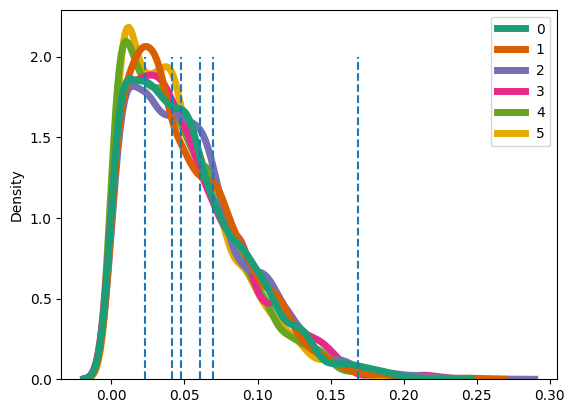

In [80]:
kdes = sns.kdeplot(abs(null_t.T), palette='Dark2', fill=False, linewidth=5)
kdes.axes.vlines(abs(results['CogFluidComp_Unadj']['t']['t']), 0, 2, linestyle='--')
# sns.scatterplot(x=abs(results["CogFluidComp_Unadj"]['t'].t), y=[1,2,3,4,5,6], hue=[1,2,3,4,5,6], palette='Dark2')

In [82]:
results['CogFluidComp_Unadj']['t']

,coeff,t,t_p,t_p_adj,fold
G1_ROI15_Disptot,-0.069375,-0.069576,0.2692,0.6414,5.5
G1_ROI2_Disptot,-0.041486,-0.041717,0.5345,0.6414,5.5
G1_ROI38_Disptot,-0.060489,-0.060794,0.3726,0.6414,5.5
G1_ROI4_Disptot,0.022956,0.023059,0.7389,0.7389,5.5
G1_ROI6_Disptot,-0.167170,-0.168727,0.0057,0.0342,5.5
G1_ROI7_Disptot,-0.047192,-0.047618,0.4342,0.6414,5.5


,coeff,t,t_p,t_p_adj,fold
G1_ROI6_Disptot,-0.169589,-0.169108,0.02,0.12,1
G1_ROI6_Disptot,-0.154518,-0.161255,0.05,0.30,2
G1_ROI6_Disptot,-0.175584,-0.174429,0.00,0.00,3
G1_ROI6_Disptot,-0.141304,-0.141327,0.01,0.06,4
G1_ROI6_Disptot,-0.164818,-0.155894,0.05,0.30,5
...,...,...,...,...,...
G1_ROI6_Disptot,-0.171749,-0.175047,0.00,0.00,96
G1_ROI6_Disptot,-0.169378,-0.172728,0.01,0.06,97
G1_ROI6_Disptot,-0.203790,-0.195956,0.00,0.00,98
G1_ROI6_Disptot,-0.173958,-0.173211,0.01,0.06,99


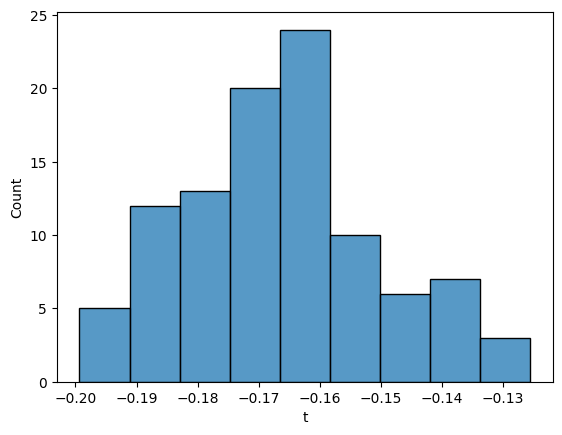

In [14]:

import seaborn as sns
# sns.kdeplot(results["CogFluidComp_Unadj"]['t']["G1_ROI6_Disptot"])
sns.histplot(results["CogFluidComp_Unadj"]['t'].loc["G1_ROI6_Disptot", "t"])
results["CogFluidComp_Unadj"]['t'].groupby(results[comp]['t'].index).median()
results["CogFluidComp_Unadj"]['t'].loc["G1_ROI6_Disptot"]

In [5]:
# WIP cell to introduce cross-validation ####################################################

import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from joblib import Parallel, delayed
from itertools import combinations
from scipy import stats
import statsmodels.api as sm
from settings import *

#----------------------------------------------------------------------------------------------------

''' Run permutation tests '''

# Aggregate highly correlated predictors
disp_ROIs = pd.read_csv(f'{output_dir}/{group}.gcca_dispersion.csv', header=0, usecols=["DispROI_tot"])
disp_ROIs = np.int32(np.unique(disp_ROIs)[1:])
cog_df = pd.read_csv(f'{output_dir}/{group}.cog_data.csv', index_col=0, header=0)


G = "G1"
redundant = []
non_redundant = list(disp_ROIs)

for i, j in combinations(disp_ROIs, 2):
    if i in redundant:
        continue

    r = cog_df[[f'{G}_ROI{i}_Disptot', f'{G}_ROI{j}_Disptot']].corr().loc[f'{G}_ROI{i}_Disptot', f'{G}_ROI{j}_Disptot']

    if r >= 0.6 and np.int32(f"{i}{j}") not in non_redundant:
        cog_df[f'{G}_ROI{i}{j}_Disptot'] = cog_df[[f'{G}_ROI{i}_Disptot', f'{G}_ROI{j}_Disptot']].mean(axis=1)
        non_redundant.append(np.int32(f"{i}{j}"))
        non_redundant.remove(i)
        non_redundant.remove(j)
        redundant.extend([i,j])



comp_cols = ['CogFluidComp_Unadj', 'CogCrystalComp_Unadj', 'G']
ROI_cols = np.array([f'G1_ROI{i}_Disptot' for i in non_redundant])
covars = ['C(Gender)', 'Age_in_Yrs', 'Handedness', 'SSAGA_Educ', "FD"]


# Correct for covariates
X = ' + '.join(covars)
for col in comp_cols:
    lm = ols(f'{col} ~ {X}', data=cog_df).fit()
    cog_df[col] = stats.zscore(lm.resid, axis=0)

#----------------------------------------------------------------------------------------------------

# Run permutation tests
perm_n = 100
X = ' + '.join(ROI_cols)
F_tests = []
F_test_p = []

results = {}
for y in comp_cols:
    F, t, F_null, t_null = perm_lm(f'{y} ~ {X}', cog_df, perm_n, perm_cols=None, n_jobs=-2)
    results[y] = {'F': F, 't': t, 'F_null': F_null, 't_null': t_null}
    

#----------------------------------------------------------------------------------------------------

# Correct multiple comparisons
pF_adj = sm.stats.multipletests([values['F']['p'] for key, values in results.items()], method='fdr_bh', alpha=0.05)[1]

for i, key in enumerate(results.keys()):
    results[key]['F']['p_adj'] = pF_adj[i]
    results[key]['t']['p_adj'] = np.hstack(['',sm.stats.multipletests(results[key]['t']['p'][1:], method='fdr_bh', alpha=0.05)[1]])

global_results = pd.DataFrame([results['CogFluidComp_Unadj']['F'], results['CogCrystalComp_Unadj']['F'], results['G']['F']])

print(global_results)

for key, value in results.items():
    if results[key]['F']['p'] < 1:
        print(f"post-hoc:\t{key}\n", pd.DataFrame(results[key]['t']), '\n')




#----------------------------------------------------------------------------------------------------
  

                  Endog         F        R2    R2_adj     p  p_adj
0    CogFluidComp_Unadj  2.799889  0.032183  0.020688  0.02   0.06
1  CogCrystalComp_Unadj  1.634829  0.019046  0.007396  0.14   0.21
2                     G  0.994060  0.011668 -0.000070  0.48   0.48
post-hoc:	CogFluidComp_Unadj
                       Coef         t        SE     p                p_adj
Intercept         0.486091  2.076253  0.234120  0.04                     
G1_ROI2_Disptot   1.130271  0.596620  1.894459  0.61                 0.61
G1_ROI5_Disptot  -6.766757 -2.515091  2.690462  0.03                 0.15
G1_ROI6_Disptot  -2.743046 -0.906175  3.027061  0.24  0.36249999999999993
G1_ROI14_Disptot -1.847411 -1.085396  1.702061  0.29  0.36249999999999993
G1_ROI37_Disptot -3.082810 -2.157441  1.428920  0.07  0.17500000000000002 

post-hoc:	CogCrystalComp_Unadj
                       Coef         t        SE     p   p_adj
Intercept        -0.392406 -1.664831  0.235703  0.11        
G1_ROI2_Disptot   2.150317  

5

In [93]:
# looking for subjects to dd as replication dataset

from settings import *
import numpy as np
import random

all_subjs = np.loadtxt(f"{subj_dir}/subj_IDs_338.txt", dtype='int32')
som_subjs = np.loadtxt(f"{subj_dir}/subj_IDs_525.txt", dtype='int32')
subjs = np.loadtxt(f"{subj_dir}/subj_IDs.txt", dtype='int32')



# np.sum(np.isin(all_subjs, som_subjs))
subjs
df = pd.read_csv(f'{cog_path}', index_col='Subject')
df = df.loc[subjs]
df = df.loc[df["3T_RS-fMRI_Count"] == 4, :]
# # df = df.loc[:, ['PicVocab_Unadj', 'ReadEng_Unadj', 'CardSort_Unadj', 'Flanker_Unadj', 'ProcSpeed_Unadj',
# #                                'VSPLOT_TC', 'PMAT24_A_CR', 'PicSeq_Unadj', 'ListSort_Unadj', 'IWRD_TOT',
# #                                'CogFluidComp_Unadj', 'CogCrystalComp_Unadj']].dropna()


fam = pd.read_csv(f'{rest_path}', index_col='Subject', usecols=['Subject', 'Family_ID'])
df = df.merge(fam, left_index=True, right_index=True)
df.Family_ID = pd.Categorical(df.Family_ID)
df.drop_duplicates(subset="Family_ID", inplace=True, keep='first')

df.drop(all_subjs[np.isin(all_subjs,df.index)], inplace=True)
subjects = df.index.to_list()

# # List of subjects
# subjects = df.index.to_list()

# # Randomly select half of the subjects
# sample1 = random.sample(subjects, len(subjects)//2)

# # Remaining subjects form the second sample
# sample2 = [subj for subj in subjects if subj not in sample1]

# print("Sample 1:", sample1)
# print("Sample 2:", sample2)

# np.savetxt(f"/home/fralberti/Data/HCP_1200/Subjects/subj_IDs_214a.txt", sample1, delimiter='\n', fmt='%i')
# np.savetxt(f"/home/fralberti/Data/HCP_1200/Subjects/subj_IDs_214b.txt", sample2, delimiter='\n', fmt='%i')

# df = df[df.Handedness > 0]

# df.drop(all_subjs)
# replication = [i for i in df.index if i not in som_subjs]
# len(replication)

# np.savetxt(f"{root_dir}/Subjects/subj_IDs_187.txt", replication, delimiter='\n', fmt='%i')
len(df)

187

In [1]:
import numpy as np
import os, sys, re, time
from scipy.sparse.linalg import svds
import nibabel as nib
import hcp_utils as hcp
import pandas as pd

# read arguments
atlas="/home/fralberti/Data/Shaefer2018_HCP/Schaefer2018_400Parcels_7Networks_order.dlabel.nii"
out_dir="/home/fralberti/Code/ClusterJobs"
subj=966975

cortex = np.hstack([hcp.vertex_info.grayl, hcp.vertex_info.grayr + hcp.vertex_info.num_meshl])
labels = nib.load(atlas).get_fdata()[0, cortex]
concat_tseries = np.load(f'{out_dir}/{subj}.rfMRI_REST_All_Atlas_MSMAll_hp2000_smooth.npy')

concat_tseries = pd.DataFrame(concat_tseries)
concat_tseries["lab"] = labels
nw_tseries = concat_tseries.groupby("lab").agg("mean").drop(0)
fc = nw_tseries.T.corr(method="pearson")

fc.to_csv(f"{out_dir}/{subj}.REST_All_fcMatrix.csv", index=False, header=False)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


### graph_analysis.py

In [65]:
# Import dependencies

import os
import nibabel as nib
import numpy as np
from scipy import stats
import pandas as pd
import ciftools_FA as ct
import statsmodels.api as sm
import matplotlib.pyplot as plt
import subprocess as sp
from joblib import Parallel, delayed
import networkx as nx
# from settings import root_dir, output_dir, subj_id, group, lbl_N, nw_N, networks, networks_txt, NW_tbl, nw_name, nj
subj_dir = f"{root_dir}/Subjects/"
gcca_dir = f"{output_dir}/GCCA"
#----------------------------------------------------------------------------------------------------


''' Generate FC graphs and extract topological metrics '''

thr = 90

NWs_n_ROIs = nib.load(f'{output_dir}/{group}.dispROIs_Schaefer2018_{lbl_N}Parcels_{nw_N}Networks.dlabel.nii')

modules_df = ct.agg_networks(NWs_n_ROIs, NWs_n_ROIs)[1][1:].reset_index()

communities = [set(modules_df.label.astype('int32')[modules_df.network==nw].values) for nw in modules_df.network.unique()]
nodes = dict( zip( range( len(modules_df.index) ), modules_df.label) )

def graph_diagnostics(subj, root_dir, communities, thr):
    M = np.genfromtxt(f'{subj_dir}/{subj}/Analysis/{subj}.REST_All_fcMatrix.csv', delimiter=',')[1:, 1:]
    M = np.tanh(M)##############################################################################################################################################
    G = nx.from_numpy_matrix(M)
    G.threshold(thr)
    G = nx.relabel_nodes(G, nodes)
    G = nx.algorithms.full_diagnostics(G, modules=communities, swi=False)
    nx.write_gpickle(G,f'{subj_dir}/{subj}/Analysis/{subj}.rfMRI_graph_{thr}.Schaefer_400parcs.gpickle')
    return [subj]

_ = Parallel(n_jobs=nj, prefer='processes')(delayed(graph_diagnostics)(subj, root_dir, communities, thr) for subj in subj_id)

#----------------------------------------------------------------------------------------------------


''' Save graph metrics of interest to cifti '''

attributes = ['strength', 'clustering', 'global_e', 'local_e', 'between_c', 'participation_c']

def get_graph(subj):
    return nx.read_gpickle(f'{subj_dir}/{subj}/Analysis/{subj}.rfMRI_graph_{thr}.Schaefer_400parcs.gpickle')

individual_maps = []
for subj in subj_id:
    G = get_graph(subj)
    metrics = np.array([list(nx.get_node_attributes(G, attribute).values()) for attribute in attributes])
    
    # isolates = nx.isolates(G)
    # metrics[:,np.isin(G, list(isolates))] = np.nan
    individual_maps.append(stats.zscore(metrics, axis=1))
    
    
individual_maps = np.array(individual_maps)
np.save(f'{output_dir}/{group}.graph_metrics.dispROIs_{lbl_N}Parc', individual_maps)

graph_dispersion_maps = stats.iqr(individual_maps, 0, rng=(25, 75), nan_policy='omit') 
graph_dispersion_df = pd.DataFrame(graph_dispersion_maps.T, columns=attributes)
graph_dispersion_df.to_csv(f'{output_dir}/{group}.graph_metrics_dispersion.IQR_Schaefer2018_{lbl_N}Parc_{nw_N}NW.csv', index=False)


joint_atlas = nib.load(f'{output_dir}/{group}.dispROIs_Schaefer2018_{lbl_N}Parcels_{nw_N}Networks.dlabel.nii')
labels = joint_atlas.get_fdata().copy().squeeze().astype('int32')
label_idx = stats.rankdata(labels, method='dense').squeeze() -1 


scalars = np.zeros([graph_dispersion_df.shape[1], labels.size]).T

for lbl, val in graph_dispersion_df.iterrows():
    scalars[label_idx==lbl+1, :] = val.values

out = f'{output_dir}/{group}.graph_dispersion.dispROIs_{lbl_N}Parc.32k_fs_LR.dscalar.nii'
ct.save_dscalar(scalars.T, joint_atlas, out, names=attributes)



### metric_maps.py

In [ ]:
# Import dependencies

import os
import nibabel as nib
import numpy as np
from scipy import stats
import pandas as pd
import ciftools_FA as ct
import statsmodels.api as sm
import matplotlib.pyplot as plt
import subprocess as sp
from joblib import Parallel, delayed
import networkx as nx
# from settings import root_dir, output_dir, subj_id, group, lbl_N, nw_N, networks, networks_txt, NW_tbl, nw_name, nj
subj_dir = f"{root_dir}/Subjects/"
gcca_dir = f"{output_dir}/GCCA"
#----------------------------------------------------------------------------------------------------


''' Test correlation between dispersion of graph metrics and principal gradient '''

gcca_dispersion = np.load(f'{output_dir}/{group}.gcca_dispersion.dispROIs_{lbl_N}Parc.npy')[:,1:]
gcca_median = np.median(np.load(f'{output_dir}/{group}.gcca.dispROIs_{lbl_N}Parc.npy')[:,0,1:].squeeze(), axis=0)
graph_dispersion_df = pd.read_csv(f'{output_dir}/{group}.graph_metrics_dispersion.IQR_Schaefer2018_{lbl_N}Parc_{nw_N}NW.csv')

graph_dispersion_df['gcca_disp'] = gcca_dispersion[1:,0]
graph_dispersion_df['gcca'] = gcca_median
graph_dispersion_df[graph_dispersion_df==0] = np.nan


results = {}

for i, graph_dispersion in enumerate(graph_dispersion_df.T.iterrows()):
    if i == 6:
        break
    x = graph_dispersion_df['gcca_disp']
    y = graph_dispersion[1]
    spearman_r = stats.spearmanr(x, y, nan_policy='omit')
    
    results[graph_dispersion[0]] = {'r': spearman_r[0],
                                    'p': spearman_r[1]}

p_unadj = [value['p'] for key, value in results.items()]
p_adj = sm.stats.multipletests(p_unadj, method='fdr_bh')[1]

for i, key in enumerate(results):
    results[key]['p_adj'] = p_adj[i]
    
print(pd.DataFrame(results).T)

#----------------------------------------------------------------------------------------------------


''' Test cross-subject correlation between graph metrics and principal gradient '''

attributes = ['strength', 'clustering', 'global_e', 'local_e', 'between_c', 'participation_c']


gcca = np.load(f'{output_dir}/{group}.gcca.dispROIs_{lbl_N}Parc.npy')[:,:,1:]
gmetrics = np.load(f'{output_dir}/{group}.graph_metrics.dispROIs_{lbl_N}Parc.npy')

results = {attribute:{'r':[], 'p':[]} for attribute in attributes}

for i, parc_metrics in enumerate(gmetrics[:, :, :].T):
    for j, metric in enumerate(parc_metrics):
        r, p = stats.spearmanr(metric, gcca[:,0,i], nan_policy='omit')
        results[attributes[j]]['r'].extend(np.array([r]))
        results[attributes[j]]['p'].extend(np.array([p]))
        
for metric, dictionary in results.items():
    h, p, _, _ = sm.stats.multipletests(dictionary['p'], alpha=0.05/len(attributes), method='fdr_bh')
    results[metric]['p_adj'] = p
    
scalars = [results[metric][index] for metric in results.keys() for index in results[metric].keys()]
scalars = np.array(scalars)


joint_atlas = nib.load(f'{output_dir}/{group}.dispROIs_Schaefer2018_{lbl_N}Parcels_{nw_N}Networks.dlabel.nii')
labels = joint_atlas.get_fdata().copy().squeeze().astype('int32')
label_idx = stats.rankdata(labels, method='dense').squeeze() -1 

maps_array = np.zeros([scalars.shape[0], labels.size])

for i, scalar in enumerate(scalars):
    for lbl in np.unique(label_idx):
        if lbl==0:
            continue
        maps_array[i, label_idx==lbl] = scalar[lbl-1]
    
out = f'{output_dir}/{group}.graph_metric_correlation.dispROIs_{lbl_N}Parc.32k_fs_LR.dscalar.nii'
names = np.asanyarray([[f'{metric}_R', f'{metric}_pval', f'{metric}_pval_fdr'] for metric in results]).reshape(-1).tolist()
ct.save_dscalar(maps_array, joint_atlas, out, names=names)


for i in range(-8,0,1):
    ROI = f"ROI{9+i}\n"
    res = {metric: {'r': dictionary['r'][i], 'p_adj':dictionary['p_adj'][i]} for metric, dictionary in results.items()}
    print('\n'+ROI, pd.DataFrame(res))


In [ ]:
# Import dependencies

import os
import nibabel as nib
import numpy as np
from scipy import stats
import pandas as pd
import ciftools_FA as ct
import statsmodels.api as sm
import matplotlib.pyplot as plt
import subprocess as sp
from joblib import Parallel, delayed
import networkx as nx
from settings import root_dir, output_dir, subj_id, group, lbl_N, nw_N, networks, networks_txt, NW_tbl, nw_name, nj
subj_dir = f"{root_dir}/Subjects/"
gcca_dir = f"{output_dir}/GCCA"
#----------------------------------------------------------------------------------------------------


''' Test correlation between dispersion of graph metrics and principal gradient '''

gcca_dispersion = np.load(f'{output_dir}/{group}.gcca_dispersion.dispROIs_{lbl_N}Parc.npy')[:,1:]
gcca_median = np.median(np.load(f'{output_dir}/{group}.gcca.dispROIs_{lbl_N}Parc.npy')[:,0,1:].squeeze(), axis=0)
graph_dispersion_df = pd.read_csv(f'{output_dir}/{group}.graph_metrics_dispersion.IQR_Schaefer2018_{lbl_N}Parc_{nw_N}NW.csv')

graph_dispersion_df['gcca_disp'] = gcca_dispersion[1:,0]
graph_dispersion_df['gcca'] = gcca_median
graph_dispersion_df[graph_dispersion_df==0] = np.nan


results = {}

for i, graph_dispersion in enumerate(graph_dispersion_df.T.iterrows()):
    if i == 6:
        break
    x = graph_dispersion_df['gcca_disp']
    y = graph_dispersion[1]
    spearman_r = stats.spearmanr(x, y, nan_policy='omit')
    
    results[graph_dispersion[0]] = {'r': spearman_r[0],
                                    'p': spearman_r[1]}

p_unadj = [value['p'] for key, value in results.items()]
p_adj = sm.stats.multipletests(p_unadj, method='fdr_bh')[1]

for i, key in enumerate(results):
    results[key]['p_adj'] = p_adj[i]
    
print(pd.DataFrame(results).T)

#----------------------------------------------------------------------------------------------------


''' Test cross-subject correlation between graph metrics and principal gradient '''

attributes = ['strength', 'clustering', 'global_e', 'local_e', 'between_c', 'participation_c']


gcca = np.load(f'{output_dir}/{group}.gcca.dispROIs_{lbl_N}Parc.npy')[:,:,1:]
gmetrics = np.load(f'{output_dir}/{group}.graph_metrics.dispROIs_{lbl_N}Parc.npy')

results = {attribute:{'r':[], 'p':[]} for attribute in attributes}

for i, parc_metrics in enumerate(gmetrics[:, :, :].T):
    for j, metric in enumerate(parc_metrics):
        r, p = stats.spearmanr(metric, gcca[:,0,i], nan_policy='omit')
        results[attributes[j]]['r'].extend(np.array([r]))
        results[attributes[j]]['p'].extend(np.array([p]))
        
for metric, dictionary in results.items():
    h, p, _, _ = sm.stats.multipletests(dictionary['p'], alpha=0.05, method='fdr_by')
    dictionary['p'] = p
    dictionary['r'] = dictionary['r']
    
scalars = [results[metric][index] for metric in results.keys() for index in results[metric].keys()]
scalars = np.array(scalars)


joint_atlas = nib.load(f'{output_dir}/{group}.dispROIs_Schaefer2018_{lbl_N}Parcels_{nw_N}Networks.dlabel.nii')
labels = joint_atlas.get_fdata().copy().squeeze().astype('int32')
label_idx = stats.rankdata(labels, method='dense').squeeze() -1 

maps_array = np.zeros([scalars.shape[0], labels.size])

for i, scalar in enumerate(scalars):
    for lbl in np.unique(label_idx):
        if lbl==0:
            continue
        maps_array[i, label_idx==lbl] = scalar[lbl-1]
    
out = f'{output_dir}/{group}.graph_metric_correlation.dispROIs_{lbl_N}Parc.32k_fs_LR.dscalar.nii'
names = np.asanyarray([[f'{metric}_R', f'{metric}_pval'] for metric in results]).reshape(-1).tolist()
ct.save_dscalar(maps_array, joint_atlas, out, names=names)


In [ ]:
'''
OLDER RESULTS:

                        r             p         p_adj
strength        -0.032711  5.110189e-01  5.110189e-01
clustering      -0.284300  5.489988e-09  1.097998e-08
global_e        -0.306636  2.751144e-10  8.253431e-10
local_e         -0.391301  2.633982e-16  1.580389e-15
between_c        0.229578  2.951158e-06  4.426737e-06
participation_c -0.100633  4.270327e-02  5.124392e-02

ROI1
            strength  clustering      global_e   local_e  between_c  \
r     -4.790970e-01   -0.036773 -5.680969e-01 -0.107908  -0.189093   
p_adj  2.689819e-20    0.569689  1.811767e-29  0.077359   0.001218   

       participation_c  
r        -5.649746e-01  
p_adj     6.766986e-29  

ROI2
        strength  clustering      global_e   local_e  between_c  \
r     -0.087005    0.048551 -2.836531e-01 -0.054197  -0.156766   
p_adj  0.122065    0.444775  2.033876e-07  0.401606   0.007500   

       participation_c  
r        -4.693898e-01  
p_adj     3.230216e-19  
...

       participation_c  
r             0.248884  
p_adj         0.000007 
'''

In [56]:
import os
import nibabel as nib
import numpy as np
from scipy import stats
import pandas as pd
import ciftools_FA as ct
import statsmodels.api as sm
import matplotlib.pyplot as plt
import subprocess as sp
from joblib import Parallel, delayed
import networkx as nx
# from settings import root_dir, output_dir, subj_id, group, lbl_N, nw_N, networks, networks_txt, NW_tbl, nw_name, nj
subj_dir = f"{root_dir}/Subjects/"
gcca_dir = f"{output_dir}/GCCA"

def get_graph(subj, thr):
    ''' helper function to load graph object '''
    return nx.read_gpickle(f'{subj_dir}/{subj}/Analysis/{subj}.rfMRI_graph_{thr}.Schaefer_400parcs.gpickle')

#-----------------------------------------------------------------------------------------------------------------------


cog_cols = ["CogFluidComp_Unadj"]
gcca_cols = [f"G1_ROI6_Disptot"]
covar_cols = ['Gender', 'Age_in_Yrs', 'Handedness', 'SSAGA_Educ']
gmetrics_cols = ['strength', 'clustering', 'global_e', 'local_e', 'between_c', 'participation_c']


cog_df = pd.read_csv(f'{output_dir}/{group}.cog_data.csv', 
                    usecols=["Subject", 'Gender', 'Age_in_Yrs', 'Handedness', 'SSAGA_Educ', "G1_ROI6_Disptot", "CogFluidComp_Unadj"], 
                    header=0, index_col="Subject")


# gmetrics = np.load(f'{output_dir}/{group}.graph_metrics.dispROIs_{lbl_N}Parc.npy')[:, :, -3]
# gmetrics = pd.DataFrame(gmetrics, index=cog_df.index, columns=gmetrics_cols)

thr = 90
ROI = 1006
gmetrics = {}
for subj in subj_id:
    G = get_graph(subj, thr)
    node_attrib = G.nodes.data()[ROI]
    node_attrib['participation_c'] = nx.participation.participation_coef(G=G, communities=communities, weight='weight')
    gmetrics[subj] = node_attrib

gmetrics = pd.DataFrame.from_dict(gmetrics, orient='index')

data = cog_df.merge(gmetrics, left_index=True, right_index=True)


# Correct fluid intelligence for covariates
lm = ols('CogFluidComp_Unadj ~ (Gender) + Age_in_Yrs + Handedness + SSAGA_Educ', data=cog_df).fit()
data["CogFluidComp_Resid"] = lm.resid

data[["CogFluidComp_Resid", "G1_ROI6_Disptot", "participation_c" ]] = stats.zscore(data[["CogFluidComp_Resid", "G1_ROI6_Disptot", "participation_c" ]], 
                                                                                    axis=0, nan_policy='omit')

import statsmodels.api as sm
from statsmodels.stats.mediation import Mediation

outcome_model = sm.OLS.from_formula("CogFluidComp_Resid ~ G1_ROI6_Disptot + participation_c", data.dropna())
mediator_model = sm.OLS.from_formula("participation_c ~ G1_ROI6_Disptot", data.dropna())
med = Mediation(outcome_model, mediator_model, "G1_ROI6_Disptot", "participation_c").fit(method='bootstrap', n_rep=100)
med.summary()



,Estimate,Lower CI bound,Upper CI bound,P-value
ACME (control),-3.270460,-83.700018,31.434957,0.74
ACME (treated),-3.270460,-83.700018,31.434957,0.74
ADE (control),-7.529413,-23.740054,1.514367,0.52
ADE (treated),-7.529413,-23.740054,1.514367,0.52
Total effect,-10.799873,-95.412344,19.722630,0.96
Prop. mediated (control),0.523438,-5.149933,10.538039,0.30
Prop. mediated (treated),0.523438,-5.149933,10.538039,0.30
ACME (average),-3.270460,-83.700018,31.434957,0.74
ADE (average),-7.529413,-23.740054,1.514367,0.52
Prop. mediated (average),0.523438,-5.149933,10.538039,0.30


In [3]:

import os
import nibabel as nib
import numpy as np
from scipy import stats
import pandas as pd
import ciftools_FA as ct
import statsmodels.api as sm
from joblib import Parallel, delayed
from settings import * 


for subj in subj_id:
    grad = nib.load(f"{subj_dir}/{subj_id[0]}/Analysis/{subj_id[0]}.GCCA_525.32k_fs_LR.dscalar.nii").get_fdata().squeeze()
    np.save(f"{gcca_dir}/{subj}.GCCA.npy", grad)


## **WIP**

In [43]:
import statsmodels.api as sm
import statsmodels.genmod.families.links as links
from statsmodels.stats.mediation import Mediation


def sobel_test(a, b, se_a, se_b):
    '''
    Sobel test for significance of mediation
    
    Args: 
        a: coefficient from X to mediator variable, M
        b: coefficient from M to Y 
        se_a: Standard error of A
        se_b: Standard error fo B

    Returns: 
        t: Sobel's test statistic
        pval : Two-tailed probability assuming normal distribution
    '''
    
    SE = np.sqrt( (a**2)*(se_a**2) + (b**2)*(se_b**2))
    t = (a*b) / SE
    n = 100000000
    pval = stats.t.sf(np.abs(t), n-1)*2
    return t, pval



def mediation_analyis(x,y,m,data):
    y = data.dropna()[y] #stats.zscore(data.dropna()[y], axis=0)
    x = data.dropna()[x] #stats.zscore(data.dropna()[x], axis=0)
    m = data.dropna()[m] #stats.zscore(data.dropna()[m], axis=0)

    # Effect of X on Y
    X = pd.DataFrame({'Intercept':np.ones(len(x)),'X':x})
    lm1 = sm.OLS(y,X).fit()
    ec = lm1.params[1] # save total effect c to e

    print("\n\nX-Y\n", lm1.summary())



    # Effect of X on M

    lm2 = sm.OLS(m,X).fit()
    ea = lm2.params[1] # Save the effect of X on M, a, to ea
    sea = lm2.bse[1]


    print("\n\nX-M\n", lm2.summary())


    # Effect of W & M on Y
    X['M'] = m
    lm3 = sm.OLS(y,X).fit()
    ecq,eb = lm3.params[1:3]
    seb = lm3.bse[2]

    print("\n\nXM-Y\n", lm3.summary())


    # c = a \cdot b + c' $
    print(f'c : {ec}')
    print(f'a : {ea}')
    print(f'b : {eb}')
    print(f'c\' : {ecq}')

    print(f'Total effect C: {ec}')
    print(f'is decomposed into the indirect(mediated) effect a*b: {(ea*eb)}')
    print(f'plus the direct effect c\': {ecq}')
    print(f'which adds up to {ea*eb+ecq}')


    t,p = sobel_test(ea,eb,sea,seb)
    print(f"\n\nSobel test\nt={t}, p={p}")

##### betweenness

In [79]:

# Import dependencies

import os
import networkx as nx
import nibabel as nib
import numpy as np
from scipy import stats
import pandas as pd
import ciftools_FA as ct
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import subprocess as sp
from joblib import Parallel, delayed
#from settings import root_dir, output_dir, subj_id, group, lbl_N, nw_N, networks, networks_txt, NW_tbl, nw_name, nj
subj_dir = f"{root_dir}/Subjects/"
gcca_dir = f"{output_dir}/GCCA"

#--------------------------------------------------------------------------------------------------------------------

def get_graph(subj, thr):
    ''' helper function to load graph object '''
    return nx.read_gpickle(f'{subj_dir}/{subj}/Analysis/{subj}.rfMRI_graph_{thr}.Schaefer_400parcs.gpickle')

def subset_centrality(subj, thr=None, sources=None, targets=None, subset=None):
    ''' Get centrality of ROIs between specific networks '''
    G = get_graph(subj, thr=thr)
    betweenness = nx.betweenness_centrality_subset(G=G, sources=sources, targets=targets, weight='weight')

    return (subj, {f"BC_ROI{node-1000}": betweenness[node] for node in subset})


#---------------------------------------------------------------------------------------------------------------------

thr = 90
joint_atlas = nib.load(f'{output_dir}/{group}.dispROIs_Schaefer2018_{lbl_N}Parcels_{nw_N}Networks.dlabel.nii')
nw_tbl = ct.agg_networks(joint_atlas, joint_atlas, label_tbl=True)[1].reset_index()[1:]

unimodal = nw_tbl.label[nw_tbl.name.isin(['Vis', 'SomMot'])].to_numpy()
transmodal = nw_tbl.label[nw_tbl.name.isin(['Default'])].to_numpy()
ROIs = nw_tbl.label[nw_tbl.name == 'ROI'].to_numpy()
intermediate = nw_tbl.label[~nw_tbl.name.isin(['Vis', 'SomMot', 'Default', 'Limbic', 'ROI'])].to_numpy()


unitra = {}
pct_min = 10
pct_max = 90
for subj in subj_id:
    G = get_graph(subj, thr=thr)
    parcs_gcca = np.load(f'{output_dir}/{subj}.gcca.dispROIs_{lbl_N}Parc.npy')[1:-8, 0]
    pctiles = np.percentile(parcs_gcca, [pct_min, pct_max])

    nodes = np.array(G.nodes)[:-8]
    unitra[subj] = {'uni': nodes[parcs_gcca <= pctiles[0]], 'tra': nodes[parcs_gcca >= pctiles[1]]}

betweenness = Parallel(n_jobs=nj)(delayed(subset_centrality)(subj, thr=thr, sources=unitra[subj]['uni'], targets=unitra[subj]['tra'], subset=ROIs) for subj in subj_id)
between_df = pd.DataFrame.from_dict(dict(betweenness), orient='index')

cog_cols = ["CogFluidComp_Unadj", "CogCrystalComp_Unadj", "G"]
gcca_cols = [f"G1_ROI{n}_Disptot" for n in range(1,9)]
cog_df = pd.read_csv(f'{output_dir}/{group}.cog_data.csv', 
                    usecols=["Subject"]+cog_cols+gcca_cols, 
                    header=0, index_col="Subject")

data = cog_df.merge(between_df, left_index=True, right_index=True)
data.head(10)


,CogFluidComp_Unadj,CogCrystalComp_Unadj,G,G1_ROI1_Disptot,G1_ROI2_Disptot,G1_ROI3_Disptot,G1_ROI4_Disptot,G1_ROI5_Disptot,G1_ROI6_Disptot,G1_ROI7_Disptot,G1_ROI8_Disptot,BC_ROI1,BC_ROI2,BC_ROI3,BC_ROI4,BC_ROI5,BC_ROI6,BC_ROI7,BC_ROI8
Subject,,,,,,,,,,,,,,,,,,,
100206,134.34,117.33,38.167772,-0.003582,0.008376,0.054204,0.066249,0.010917,0.040934,0.126717,0.050015,111.5,11.0,0.0,12.0,92.5,16.0,9.0,0.0
100307,118.16,109.38,35.487758,0.063157,-0.003727,0.046314,0.087762,0.046657,0.050964,0.134389,0.037399,14.5,16.5,0.0,8.5,45.0,50.5,0.0,0.0
100408,116.64,134.34,38.339332,-0.006731,-0.008264,0.125623,0.102411,0.029187,-0.019835,0.105784,0.119410,34.0,16.5,0.0,20.0,7.0,2.0,0.0,0.0
101006,91.44,104.51,31.977007,0.082610,0.090143,0.117832,0.030504,-0.007364,0.060965,0.092157,0.103373,7.0,5.0,1.5,0.0,24.0,16.5,9.5,0.0
101107,117.37,120.73,37.171652,0.019663,0.021768,0.150398,0.063453,0.052891,0.017062,0.080462,0.129763,25.0,0.0,0.0,4.0,20.5,4.5,44.0,0.0
101309,107.14,115.59,35.032457,-0.072193,-0.041935,0.003437,0.098647,-0.072820,0.038466,0.119774,0.008331,23.5,3.5,0.0,22.5,47.0,12.0,0.0,0.0
101915,101.27,122.72,35.849239,-0.041316,0.104266,0.094149,0.033486,-0.099180,0.051525,0.079730,0.074276,33.5,0.0,0.0,5.0,8.5,8.5,5.5,0.0
102008,121.39,127.84,38.218608,0.006540,0.014325,0.164611,0.117762,0.014972,0.020572,0.167196,0.159378,6.0,5.0,0.0,0.0,77.5,41.5,18.5,0.0
102109,109.52,119.86,37.090184,-0.031160,-0.050812,0.158362,0.059607,-0.041847,0.042244,0.061765,0.175705,119.5,4.5,0.0,7.5,68.5,1.0,26.5,0.0


<Axes: >

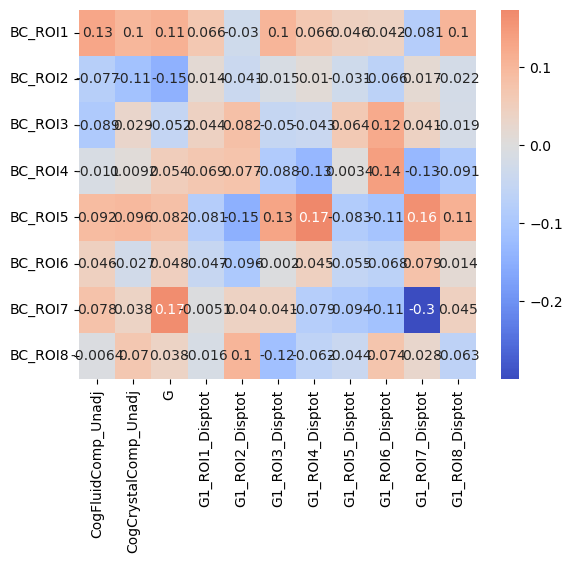

In [80]:
import seaborn as sns

sns.heatmap(data.corr().loc['BC_ROI1':, :'G1_ROI8_Disptot'], cmap='coolwarm', center=0, annot=True)

In [82]:
mediation_analyis("G", "CogFluidComp_Unadj", "BC_ROI6", data)



X-Y
                             OLS Regression Results                            
Dep. Variable:     CogFluidComp_Unadj   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     401.4
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           2.95e-59
Time:                        20:02:50   Log-Likelihood:                -1171.9
No. Observations:                 337   AIC:                             2348.
Df Residuals:                     335   BIC:                             2355.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.2350      6.132     -1.180  

#### participation

In [26]:

# Import dependencies

import os
import networkx as nx
import nibabel as nib
import numpy as np
from scipy import stats
import pandas as pd
import ciftools_FA as ct
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import subprocess as sp
from joblib import Parallel, delayed
#from settings import root_dir, output_dir, subj_id, group, lbl_N, nw_N, networks, networks_txt, NW_tbl, nw_name, nj
subj_dir = f"{root_dir}/Subjects/"
gcca_dir = f"{output_dir}/GCCA"

#--------------------------------------------------------------------------------------------------------------------

def get_graph(subj, thr):
    ''' helper function to load graph object '''
    return nx.read_gpickle(f'{subj_dir}/{subj}/Analysis/{subj}.rfMRI_graph_{thr}.Schaefer_400parcs.gpickle')

def subset_participation(subj, thr=None, drop=None, communities=None, subset=None):
    ''' Get centrality of ROIs between specific networks '''
    G = get_graph(subj, thr=thr)
    G.remove_nodes_from(drop)
    participation = nx.participation.participation_coef(G=G, communities=communities, weight='weight')

    return participation[1006]#(subj, {f"PC_ROI{node-1000}": participation[node] for node in subset})


#---------------------------------------------------------------------------------------------------------------------

thr = 90
joint_atlas = nib.load(f'{output_dir}/{group}.dispROIs_Schaefer2018_{lbl_N}Parcels_{nw_N}Networks.dlabel.nii')
nw_tbl = ct.agg_networks(joint_atlas, joint_atlas, label_tbl=True)[1].reset_index()[1:]


drop = nw_tbl.label[~nw_tbl.name.isin(['Vis', 'SomMot', 'Default', 'ROI'])].to_numpy()
ROIs = nw_tbl.label[nw_tbl.name == 'ROI'].to_numpy()
nw_tbl = nw_tbl[~np.isin(nw_tbl.label, drop)]

communities = []
for nw in nw_tbl.name.unique():
    c = nw_tbl.label[nw_tbl.name==nw].to_list()
    communities.append(set(c))



# communities = {}
# pct_min = 10
# pct_max = 90
# for subj in subj_id:
#     G = get_graph(subj, thr=thr)
#     parcs_gcca = np.load(f'{output_dir}/{subj}.gcca.dispROIs_{lbl_N}Parc.npy')[1:-8, 0]
#     pctiles = np.percentile(parcs_gcca, [pct_min, pct_max])

#     nodes = np.array(G.nodes)[:-8]
#     communities[subj] = {'c': [set(nodes[parcs_gcca <= pctiles[0]]), set(nodes[parcs_gcca >= pctiles[1]]), set(ROIs)], 
#                          'd':nodes[(parcs_gcca > pctiles[0]) & (parcs_gcca < pctiles[1])]}


def ROI6_topology(subj):
    G = get_graph(subj, thr=thr)
    ROI6_neighbors = list(G.neighbors(1006))
    ROI6_info = {k: np.isin(ROI6_neighbors, c) for c in communities}
    ROI6_info['participation'] = subset_participation(subj, thr=90, drop=drop, communities=communities, subset=None)

    return (subj, ROI6_info)


# participation = Parallel(n_jobs=nj)(delayed(subset_participation)(subj, thr=90, drop=drop, communities=communities, subset=ROIs) for subj in subj_id)
ROI6 = Parallel(n_jobs=nj)(delayed(ROI6_topology)(subj) for subj in subj_id)
ROI6_df = pd.DataFrame.from_dict(dict(ROI6), orient='index')


cog_cols = ["CogFluidComp_Unadj", "CogCrystalComp_Unadj", "G"]
gcca_cols = [f"G1_ROI{n}_Disptot" for n in range(1,9)]
cog_df = pd.read_csv(f'{output_dir}/{group}.cog_data.csv', 
                    usecols=["Subject"]+cog_cols+gcca_cols, 
                    header=0, index_col="Subject")


data = cog_df.merge(participation_df, left_index=True, right_index=True)
data.head()


NameError: name 'k' is not defined

In [24]:
len(communities)

4

In [77]:
# mediation_analyis  Boot

import statsmodels.api as sm
from statsmodels.stats.mediation import Mediation


data['G1_ROI6_bin'] = [1 if x>data.G1_ROI6_Disptot.median() else 0 for x in data.G1_ROI6_Disptot]

outcome_model = sm.OLS.from_formula("CogFluidComp_Unadj ~ G1_ROI6_Disptot + PC_ROI6", data)
mediator_model = sm.OLS.from_formula("PC_ROI6 ~ G1_ROI6_Disptot", data)
med = Mediation(outcome_model, mediator_model, "G1_ROI6_Disptot", "PC_ROI6").fit(method='bootstrap', n_rep=1000)
med.summary()

,Estimate,Lower CI bound,Upper CI bound,P-value
ACME (control),10.557707,-15.251816,36.668570,0.410
ACME (treated),10.557707,-15.251816,36.668570,0.410
ADE (control),-73.698977,-121.695419,-26.667844,0.008
ADE (treated),-73.698977,-121.695419,-26.667844,0.008
Total effect,-63.141271,-99.609260,-25.977809,0.006
Prop. mediated (control),-0.164033,-0.687834,0.289051,0.412
Prop. mediated (treated),-0.164033,-0.687834,0.289051,0.412
ACME (average),10.557707,-15.251816,36.668570,0.410
ADE (average),-73.698977,-121.695419,-26.667844,0.008
Prop. mediated (average),-0.164033,-0.687834,0.289051,0.412


In [78]:
# mediation analysis Sobel

import statsmodels.api as sm
import statsmodels.genmod.families.links as links
from statsmodels.stats.mediation import Mediation


y = stats.zscore(data.dropna()["CogFluidComp_Unadj"], axis=0)
x = stats.zscore(data.dropna()["G1_ROI6_Disptot"], axis=0)
m = stats.zscore(data.dropna()["PC_ROI6"], axis=0)

def sobel_test(a, b, se_a, se_b):
    '''
    Sobel test for significance of mediation
    
    Args: 
        a: coefficient from X to mediator variable, M
        b: coefficient from M to Y 
        se_a: Standard error of A
        se_b: Standard error fo B

    Returns: 
        t: Sobel's test statistic
        pval : Two-tailed probability assuming normal distribution
    '''
    
    SE = np.sqrt( (a**2)*(se_a**2) + (b**2)*(se_b**2))
    t = (a*b) / SE
    n = 100000000
    pval = stats.t.sf(np.abs(t), n-1)*2
    return t, pval


# Effect of X on Y
X = pd.DataFrame({'Intercept':np.ones(len(x)),'X':x})
lm1 = sm.OLS(y,X).fit()
ec = lm1.params[1] # save total effect c to e

print("\n\nX-Y\n", lm1.summary())



# Effect of X on M

lm2 = sm.OLS(m,X).fit()
ea = lm2.params[1] # Save the effect of X on M, a, to ea
sea = lm2.bse[1]


print("\n\nX-M\n", lm2.summary())


# Effect of W & M on Y
X['M'] = m
lm3 = sm.OLS(y,X).fit()
ecq,eb = lm3.params[1:3]
seb = lm3.bse[2]

print("\n\nXM-Y\n", lm3.summary())


# c = a \cdot b + c' $
print(f'c : {ec}')
print(f'a : {ea}')
print(f'b : {eb}')
print(f'c\' : {ecq}')

print(f'Total effect C: {ec}')
print(f'is decomposed into the indirect(mediated) effect a*b: {(ea*eb)}')
print(f'plus the direct effect c\': {ecq}')
print(f'which adds up to {ea*eb+ecq}')


t,p = sobel_test(ea,eb,sea,seb)
print(f"\n\nSobel test\nt={t}, p={p}")



X-Y
                             OLS Regression Results                            
Dep. Variable:     CogFluidComp_Unadj   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     9.957
Date:                Wed, 02 Aug 2023   Prob (F-statistic):            0.00175
Time:                        18:29:35   Log-Likelihood:                -473.25
No. Observations:                 337   AIC:                             950.5
Df Residuals:                     335   BIC:                             958.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.436e-15      0.054  -4.52e-14  



#### global metrics

In [152]:

# Import dependencies

import os
import networkx as nx
import nibabel as nib
import numpy as np
from scipy import stats
import pandas as pd
import ciftools_FA as ct
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import subprocess as sp
from joblib import Parallel, delayed
#from settings import root_dir, output_dir, subj_id, group, lbl_N, nw_N, networks, networks_txt, NW_tbl, nw_name, nj
subj_dir = f"{root_dir}/Subjects/"
gcca_dir = f"{output_dir}/GCCA"

#--------------------------------------------------------------------------------------------------------------------

def get_graph(subj, thr):
    ''' helper function to load graph object '''
    return nx.read_gpickle(f'{subj_dir}/{subj}/Analysis/{subj}.rfMRI_graph_{thr}.Schaefer_400parcs.gpickle')

def global_metrics(subj, thr=None):
    ''' Get centrality of ROIs between specific networks '''
    G = get_graph(subj, thr=thr)
    metrics = G.metrics

    return (subj, metrics)


#---------------------------------------------------------------------------------------------------------------------

thr = 90
joint_atlas = nib.load(f'{output_dir}/{group}.dispROIs_Schaefer2018_{lbl_N}Parcels_{nw_N}Networks.dlabel.nii')
nw_tbl = ct.agg_networks(joint_atlas, joint_atlas, label_tbl=True)[1].reset_index()[1:]


metrics = Parallel(n_jobs=nj)(delayed(global_metrics)(subj, thr=90) for subj in subj_id)
metrics_df = pd.DataFrame.from_dict(dict(metrics), orient='index')


cog_cols = ["CogFluidComp_Unadj", "CogCrystalComp_Unadj", "G"]
gcca_cols = [f"G1_ROI{n}_Disptot" for n in range(1,9)]
cog_df = pd.read_csv(f'{output_dir}/{group}.cog_data.csv', 
                    usecols=["Subject"]+cog_cols+gcca_cols, 
                    header=0, index_col="Subject")


data = cog_df.merge(metrics_df.drop(['SWI', 'connected'], axis=1), left_index=True, right_index=True)
data.head(10)


,CogFluidComp_Unadj,CogCrystalComp_Unadj,G,G1_ROI1_Disptot,G1_ROI2_Disptot,G1_ROI3_Disptot,G1_ROI4_Disptot,G1_ROI5_Disptot,G1_ROI6_Disptot,G1_ROI7_Disptot,G1_ROI8_Disptot,modularity,global_e,local_e,clustering,connected_pct
Subject,,,,,,,,,,,,,,,,
100206,134.34,117.33,38.167772,-0.003582,0.008376,0.054204,0.066249,0.010917,0.040934,0.126717,0.050015,0.348690,0.408099,0.711081,0.299175,0.940887
100307,118.16,109.38,35.487758,0.063157,-0.003727,0.046314,0.087762,0.046657,0.050964,0.134389,0.037399,0.428061,0.429012,0.737221,0.300441,0.980296
100408,116.64,134.34,38.339332,-0.006731,-0.008264,0.125623,0.102411,0.029187,-0.019835,0.105784,0.119410,0.197843,0.314709,0.603362,0.363168,0.825123
101006,91.44,104.51,31.977007,0.082610,0.090143,0.117832,0.030504,-0.007364,0.060965,0.092157,0.103373,0.405957,0.436958,0.729435,0.285510,0.987685
101107,117.37,120.73,37.171652,0.019663,0.021768,0.150398,0.063453,0.052891,0.017062,0.080462,0.129763,0.330330,0.336401,0.635626,0.388664,0.815271
101309,107.14,115.59,35.032457,-0.072193,-0.041935,0.003437,0.098647,-0.072820,0.038466,0.119774,0.008331,0.320959,0.362641,0.678151,0.338659,0.894089
101915,101.27,122.72,35.849239,-0.041316,0.104266,0.094149,0.033486,-0.099180,0.051525,0.079730,0.074276,0.285064,0.373836,0.682071,0.330630,0.903941
102008,121.39,127.84,38.218608,0.006540,0.014325,0.164611,0.117762,0.014972,0.020572,0.167196,0.159378,0.301402,0.399386,0.709459,0.372642,0.923645
102109,109.52,119.86,37.090184,-0.031160,-0.050812,0.158362,0.059607,-0.041847,0.042244,0.061765,0.175705,0.316278,0.365600,0.675784,0.383127,0.916256


<Axes: >

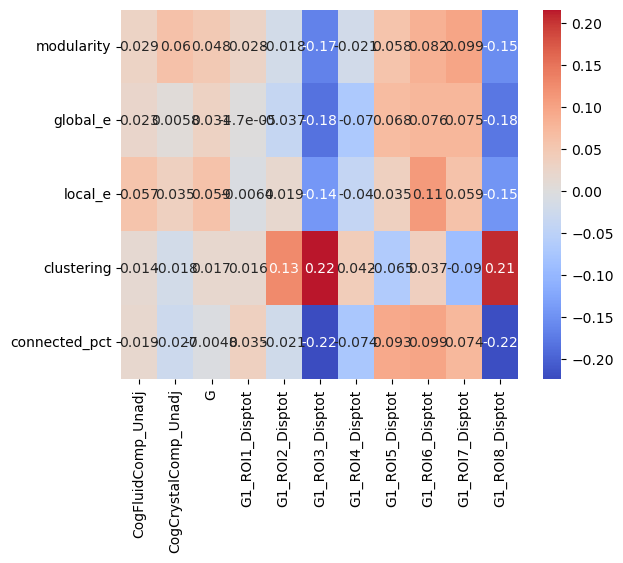

In [155]:
import seaborn as sns

sns.heatmap(data.corr().loc['modularity':, :'G1_ROI8_Disptot'], cmap='coolwarm', center=0, annot=True)


In [160]:
from statsmodels.formula.api import ols
data.dropna(inplace=True)
lm = ols("CogFluidComp_Unadj ~ G1_ROI6_Disptot:global_e", data=stats.zscore(data, axis=0)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     CogFluidComp_Unadj   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1906
Date:                Thu, 27 Jul 2023   Prob (F-statistic):              0.663
Time:                        17:52:15   Log-Likelihood:                -478.09
No. Observations:                 337   AIC:                             960.2
Df Residuals:                     335   BIC:                             967.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.0018      0.055     -0.033      0.974      -0.110       0.106
G1_ROI6_Disptot:global_e     0.0237      0.054      0.437      0.663      -0.083       0.131
==============================================================================
Omnibus:                       10.975   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                7.749
Skew:                           0.249   Prob(JB):                       0.0208
Kurtosis:                       2.448   Cond. No.                         1.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### perturbation

In [1]:

# Import dependencies

import os
import networkx as nx
import nibabel as nib
import numpy as np
from scipy import stats
import pandas as pd
import ciftools_FA as ct
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import subprocess as sp
from joblib import Parallel, delayed
#from settings import root_dir, output_dir, subj_id, group, lbl_N, nw_N, networks, networks_txt, NW_tbl, nw_name, nj
subj_dir = f"{root_dir}/Subjects/"
gcca_dir = f"{output_dir}/GCCA"

#--------------------------------------------------------------------------------------------------------------------

def get_graph(subj, thr):
    ''' helper function to load graph object '''
    return nx.read_gpickle(f'{subj_dir}/{subj}/Analysis/{subj}.rfMRI_graph_{thr}.Schaefer_400parcs.gpickle')

def global_metrics(subj, thr=None, drop=None):
    ''' Get centrality of ROIs between specific networks '''
    G = get_graph(subj, thr=thr)
    perturbed_metric = {}
    for node in drop:
        G.remove_node(node)
        perturbed_metric[f"wo_ROI{node-1000}"] = nx.modularity(G) - G.metrics['global_e']

    return (subj, perturbed_metric)


#---------------------------------------------------------------------------------------------------------------------

thr = 90
joint_atlas = nib.load(f'{output_dir}/{group}.dispROIs_Schaefer2018_{lbl_N}Parcels_{nw_N}Networks.dlabel.nii')
nw_tbl = ct.agg_networks(joint_atlas, joint_atlas, label_tbl=True)[1].reset_index()[1:]
ROIs = np.arange(1001,1009)


metrics = Parallel(n_jobs=nj)(delayed(global_metrics)(subj, thr=90, drop=ROIs) for subj in subj_id)
metrics_df = pd.DataFrame.from_dict(dict(metrics), orient='index')


cog_cols = ["CogFluidComp_Unadj", "CogCrystalComp_Unadj", "G"]
gcca_cols = [f"G1_ROI{n}_Disptot" for n in range(1,9)]
cog_df = pd.read_csv(f'{output_dir}/{group}.cog_data.csv', 
                    usecols=["Subject"]+cog_cols+gcca_cols, 
                    header=0, index_col="Subject")


data = cog_df.merge(metrics_df, left_index=True, right_index=True)
data.head(10)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


NameError: name 'root_dir' is not defined

0.013342950721829415

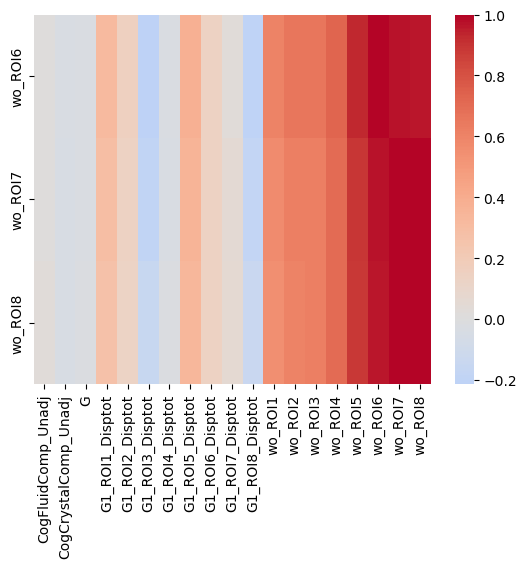

In [43]:
import seaborn as sns

sns.heatmap(data.corr(method='spearman')['wo_ROI6':], cmap='coolwarm', center=0, annot=False)
data.corr(method='spearman').loc['wo_ROI6', 'CogFluidComp_Unadj']

#### Rich club coefficient

In [20]:
import networkx as nx

def get_graph(subj, thr):
    ''' helper function to load graph object '''
    return nx.read_gpickle(f'{root_dir}/Subjects/{subj}/Analysis/{subj}.rfMRI_graph_{thr}.Schaefer_400parcs.gpickle')

def rich_club_connections(G, hubs, ROI):
    connections = {}

    neighbors = [n for n in G.neighbors(ROI)]
    connections[f"{ROI}_is_hub"] = ROI in hubs
    connections[f"{ROI}_to_hub"] = np.isin(hubs, neighbors).sum()
    connections[f"{ROI}_to_local"] = len(neighbors) - connections[f"{ROI}_to_hub"]

    return connections



joint_atlas = nib.load(f'{output_dir}/{group}.dispROIs_Schaefer2018_{lbl_N}Parcels_{nw_N}Networks.dlabel.nii')
nw_tbl = ct.agg_networks(joint_atlas, joint_atlas, label_tbl=True)[1].reset_index()[1:]
ROIs = np.arange(1001,1009)

if 'results' not in locals():
    results = {}

missing_subs = subj_id[~np.isin(subj_id, list(results.keys()))]
for subj in missing_subs:
    ntrials = 0
    while ntrials < 3:
        try:
            G = get_graph(subj, 90)
            G.remove_nodes_from(list(nx.isolates(G)))

            rcc = pd.Series(nx.rich_club_coefficient(G, normalized=True))
            K = rcc.idxmax()
            degree = pd.Series(dict(nx.degree(G)))
            hubs = degree[degree >= K]
            periphery = degree[degree < K]

            rich_club_res = rich_club_connections(G, hubs, 1006)
            results[subj] = rich_club_res
            del G
            break
        except:
            ntrials += 1
            print(subj)

richclub = pd.DataFrame.from_dict(results, orient='index')


788674


788674

In [31]:
cog_cols = ["CogFluidComp_Unadj", "CogCrystalComp_Unadj", "G"]
gcca_cols = [f"G1_ROI{n}_Disptot" for n in range(1,9)]
cog_df = pd.read_csv(f'{output_dir}/{group}.cog_data.csv', 
                    usecols=["Subject"]+cog_cols+gcca_cols, 
                    header=0, index_col="Subject")


data = cog_df.merge(richclub, left_index=True, right_index=True)
data.head(10)

,CogFluidComp_Unadj,CogCrystalComp_Unadj,G,G1_ROI1_Disptot,G1_ROI2_Disptot,G1_ROI3_Disptot,G1_ROI4_Disptot,G1_ROI5_Disptot,G1_ROI6_Disptot,G1_ROI7_Disptot,G1_ROI8_Disptot,1006_is_hub,1006_to_hub,1006_to_local
100206,134.34,117.33,38.167772,-0.003582,0.008376,0.054204,0.066249,0.010917,0.040934,0.126717,0.050015,False,4,51
100307,118.16,109.38,35.487758,0.063157,-0.003727,0.046314,0.087762,0.046657,0.050964,0.134389,0.037399,False,0,57
100408,116.64,134.34,38.339332,-0.006731,-0.008264,0.125623,0.102411,0.029187,-0.019835,0.105784,0.119410,False,0,12
101006,91.44,104.51,31.977007,0.082610,0.090143,0.117832,0.030504,-0.007364,0.060965,0.092157,0.103373,False,0,38
101107,117.37,120.73,37.171652,0.019663,0.021768,0.150398,0.063453,0.052891,0.017062,0.080462,0.129763,False,4,43
101309,107.14,115.59,35.032457,-0.072193,-0.041935,0.003437,0.098647,-0.072820,0.038466,0.119774,0.008331,False,0,17
101915,101.27,122.72,35.849239,-0.041316,0.104266,0.094149,0.033486,-0.099180,0.051525,0.079730,0.074276,False,1,39
102008,121.39,127.84,38.218608,0.006540,0.014325,0.164611,0.117762,0.014972,0.020572,0.167196,0.159378,False,0,112
102109,109.52,119.86,37.090184,-0.031160,-0.050812,0.158362,0.059607,-0.041847,0.042244,0.061765,0.175705,False,0,23
102311,109.45,114.22,35.883680,-0.007342,-0.011588,0.051881,0.095199,-0.012444,0.011229,0.086452,0.037523,False,0,35


,1006_is_hub,1006_to_hub,1006_to_local,G1_ROI6_Disptot,CogFluidComp_Unadj
1006_is_hub,1.000000,0.349670,0.383061,-0.165140,-0.010160
1006_to_hub,0.349670,1.000000,0.350704,-0.209035,0.061142
1006_to_local,0.383061,0.350704,1.000000,-0.089773,0.048250
G1_ROI6_Disptot,-0.165140,-0.209035,-0.089773,1.000000,-0.157735
CogFluidComp_Unadj,-0.010160,0.061142,0.048250,-0.157735,1.000000


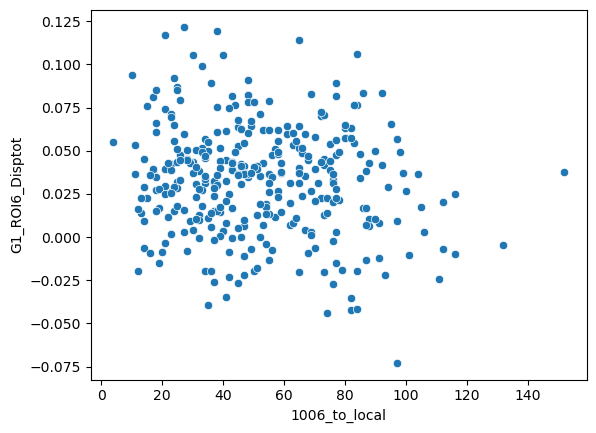

In [41]:
import seaborn as sns

sns.scatterplot(data=data, x='1006_to_local', y="G1_ROI6_Disptot")
data[['1006_is_hub', '1006_to_hub', '1006_to_local', "G1_ROI6_Disptot", 'CogFluidComp_Unadj']].corr(method='spearman')

In [45]:
from scipy import stats
mediation_analyis("G1_ROI6_Disptot", 'CogFluidComp_Unadj', '1006_to_local', data)



X-Y
                             OLS Regression Results                            
Dep. Variable:     CogFluidComp_Unadj   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     9.957
Date:                Tue, 01 Aug 2023   Prob (F-statistic):            0.00175
Time:                        19:09:36   Log-Likelihood:                -1299.6
No. Observations:                 337   AIC:                             2603.
Df Residuals:                     335   BIC:                             2611.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    117.4133      0.909    129.139  

In [54]:
from statsmodels.formula.api import ols
data['ROI6_is_hub'] = data['1006_is_hub']
mdl = ols('CogFluidComp_Unadj ~ ROI6_is_hub', data.dropna()).fit()
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     CogFluidComp_Unadj   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.01519
Date:                Tue, 01 Aug 2023   Prob (F-statistic):              0.902
Time:                        19:14:39   Log-Likelihood:                -1304.6
No. Observations:                 337   AIC:                             2613.
Df Residuals:                     335   BIC:                             2621.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             115.3518      0.657    175.476      0.000     114.059     116.645
ROI6_is_hub[T.True]    -0.3101      2.516     -0.123      0.902      -5.260       4.640
==============================================================================
Omnibus:                       10.901   Durbin-Watson:                   2.202
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                7.690
Skew:                           0.247   Prob(JB):                       0.0214
Kurtosis:                       2.449   Cond. No.                         3.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
print(subj, len(missing_subs))
# G.remove_nodes_from(list(nx.isolates(G)))

rcc = pd.Series(nx.rich_club_coefficient(G, normalized=True))
K = rcc.idxmax()
degree = pd.Series(dict(nx.degree(G)))
hubs = degree[degree >= K]
periphery = degree[degree < K]

rich_club_res = rich_club_connections(G, hubs, 1006)

results[subj] = rich_club_res
results


102614 327


{100206: {'1006_is_hub': False, '1006_to_hub': 1, '1006_to_local': 54},
 100307: {'1006_is_hub': False, '1006_to_hub': 7, '1006_to_local': 50},
 100408: {'1006_is_hub': False, '1006_to_hub': 0, '1006_to_local': 12},
 101006: {'1006_is_hub': False, '1006_to_hub': 0, '1006_to_local': 38},
 101107: {'1006_is_hub': False, '1006_to_hub': 2, '1006_to_local': 45},
 101309: {'1006_is_hub': False, '1006_to_hub': 0, '1006_to_local': 17},
 101915: {'1006_is_hub': False, '1006_to_hub': 1, '1006_to_local': 39},
 102008: {'1006_is_hub': False, '1006_to_hub': 0, '1006_to_local': 112},
 102109: {'1006_is_hub': False, '1006_to_hub': 0, '1006_to_local': 23},
 102311: {'1006_is_hub': False, '1006_to_hub': 0, '1006_to_local': 35},
 102513: {'1006_is_hub': False, '1006_to_hub': 0, '1006_to_local': 26},
 102614: {'1006_is_hub': False, '1006_to_hub': 1, '1006_to_local': 53}}

100307

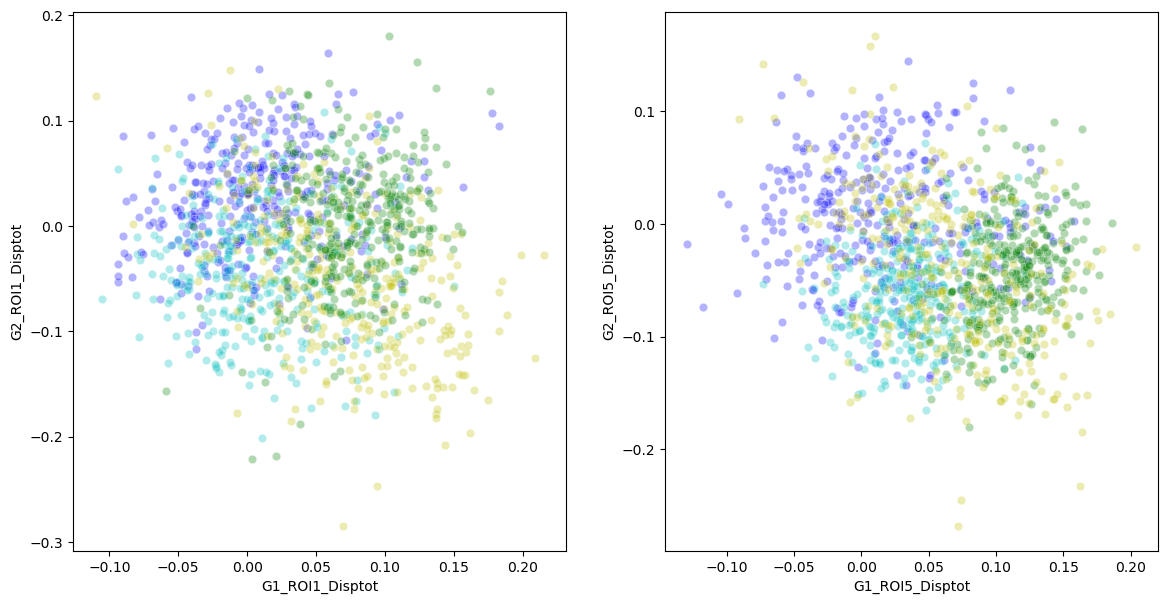

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

gcca_cols = [f"G1_ROI{n}_Disptot" for n in range(1,9)] + [f"G2_ROI{n}_Disptot" for n in range(1,9)] + [f"G3_ROI{n}_Disptot" for n in range(1,9)]
cog_df = pd.read_csv(f'{output_dir}/{group}.cog_data.csv', 
                    usecols=["Subject"]+gcca_cols, 
                    header=0, index_col="Subject")


f, axs = plt.subplots(1,2, figsize=[14,7])
c = ['b', 'c', 'y', 'g', 'b', 'c', 'g', 'y']
for i in range(1,9):
    sns.scatterplot(data=cog_df, x=f'G1_ROI{i}_Disptot', y=f'G2_ROI{i}_Disptot', ax=axs[int(i>4)], alpha=.3, color=c[i-1]) #, levels=2, fill=False, cut=0)


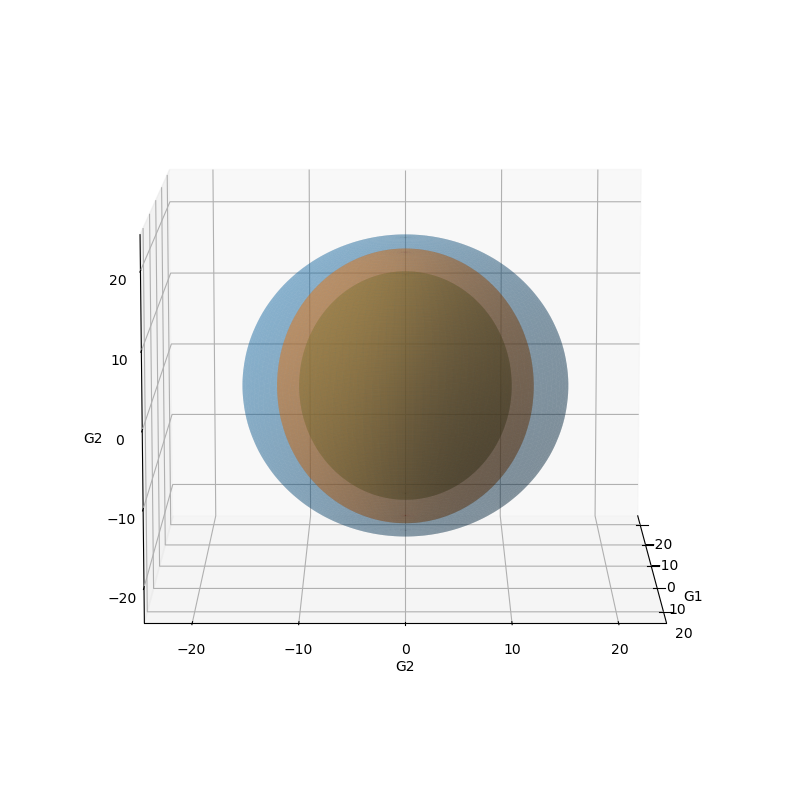

In [12]:
# from mpl_toolkits.mplot3d import Axes3D  # Not needed with Matplotlib 3.6.3
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure(figsize=[20,10])  # Square figure
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('G1')
ax.set_ylabel('G2')
ax.set_zlabel('G2')

for n in range(1,4):
    coefs = (cog_df[f"G1_ROI{n}_Disptot"].std()**2, 
            cog_df[f"G3_ROI{n}_Disptot"].std()**2, 
            cog_df[f"G2_ROI{n}_Disptot"].std()**2)  # Coefficients in a0/c x**2 + a1/c y**2 + a2/c z**2 = 1 
    # Radii corresponding to the coefficients:
    rx, ry, rz =  1/np.sqrt(coefs)

    # Set of all spherical angles:
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)

    # Cartesian coordinates that correspond to the spherical angles:
    # (this is the equation of an ellipsoid):
    x = rx * np.outer(np.cos(u), np.sin(v))
    y = ry * np.outer(np.sin(u), np.sin(v))
    z = rz * np.outer(np.ones_like(u), np.cos(v))

    # Plot:
    ax.plot_surface(x, y, z,  rstride=1, cstride=1, alpha=.3)

    # Adjustment of the axes, so that they all have the same span:
    max_radius = max(rx, ry, rz) + 5
    for axis in 'xyz':
        getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))



from matplotlib.animation import FuncAnimation, PillowWriter
# %matplotlib ipympl

angles = np.arange(0,361,10)
def animate(i):
    ax.view_init(elev=10., azim=angles[i])
    return fig,
anim = FuncAnimation(fig, animate, frames=36, interval=20)



writer = PillowWriter(fps=12)
anim.save('/home/fralberti/Desktop/dispersion_tensor.gif', writer=writer)

In [107]:
import numpy as np
from mvlearn import embed


X = [np.corrcoef(np.random.randint(0,10,10)) for i in range(5)]

gcca = embed.GCCA(n_components=3)
Xfit = gcca.fit_transform(X)


ValueError: Expected 2D array, got scalar array instead:
array=1.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [109]:
np.corrcoef(np.random.randint(0,10,10))
np.random.randint(0,10,10)

array([7, 3, 4, 8, 2, 3, 2, 9, 2, 3])

In [105]:
np.linalg.inv(X[0]).dot(Xfit[0]) == gcca.projection_mats_

array([[[False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
  

In [99]:
gcca._Vall[0].T.dot(gcca.projection_mats_[0]).shape

(10, 3)

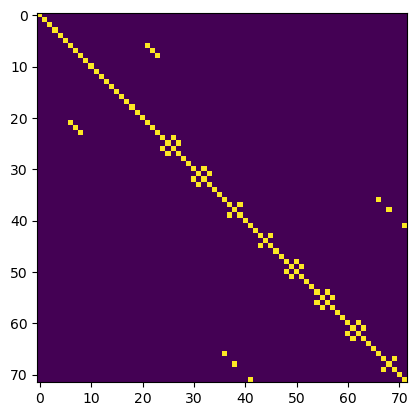

In [47]:
# Import dependencies

import os
import nibabel as nib
import numpy as np
from scipy import stats
import pandas as pd
import ciftools_FA as ct
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import subprocess as sp
from joblib import Parallel, delayed
#from settings import root_dir, output_dir, subj_id, group, lbl_N, nw_N, networks, networks_txt, NW_tbl, nw_name, nj
subj_dir = f"{root_dir}/Subjects/"
gcca_dir = f"{output_dir}/GCCA"
#----------------------------------------------------------------------------------------------------

gcca = np.load(f'{output_dir}/{group}.gcca.dispROIs_{lbl_N}Parc.npy')[:,:,-8:]
gmetrics = np.load(f'{output_dir}/{group}.graph_metrics.dispROIs_{lbl_N}Parc.npy')[:,:,-8:]

gcca_ROIs = [gcca[:,j,i] for i in range(gcca.shape[2]) for j in range(gcca.shape[1])]
gmetrics_ROIs = [gmetrics[:,j,i] for i in range(gmetrics.shape[2]) for j in range(gmetrics.shape[1])]

ROIs = ['ROI1', 'ROI2', 'ROI3', 'ROI4', 'ROI5', 'ROI6', 'ROI7', 'ROI8']
gradients = ['G1', 'G2', 'G3']
metrics = ['strength', 'clustering', 'global_e', 'local_e', 'between_c', 'participation_c']
gcca_cols = ['_'.join([roi, grad]) for roi in ROIs for grad in gradients]
gmetrics_cols = ['_'.join([roi, metric]) for roi in ROIs for metric in metrics]

gcca_df = pd.DataFrame(gcca_ROIs, index=gcca_cols, columns=subj_id).T
gmetrics_df = pd.DataFrame(gmetrics_ROIs, index=gmetrics_cols, columns=subj_id).T

data = gcca_df.merge(gmetrics_df, left_index=True, right_index=True)

 
plt.imshow(data.corr()>.8)


In [20]:
# Import dependencies

import os
import nibabel as nib
import numpy as np
from scipy import stats
import pandas as pd
import ciftools_FA as ct
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import subprocess as sp
from joblib import Parallel, delayed
#from settings import root_dir, output_dir, subj_id, group, lbl_N, nw_N, networks, networks_txt, NW_tbl, nw_name, nj
subj_dir = f"{root_dir}/Subjects/"
gcca_dir = f"{output_dir}/GCCA"
#----------------------------------------------------------------------------------------------------


''' Define functions to parallelize permutation testing '''

def perm_fit(model, data, perm_cols):
    data.loc[:, perm_cols] = np.random.permutation(data.loc[:, perm_cols])
    lm_perm = ols(model, data=data).fit()
    return lm_perm.fvalue, lm_perm.tvalues

def perm_lm(model, data, perm_n, perm_cols=None, n_jobs=1):
    lm = ols(model, data=data).fit()

    A = np.identity(len(lm.params))
    A = A[1:,:]
    F_results = {'Endog': lm.model.endog_names, 'F': lm.fvalue, 'R2': lm.rsquared, 'R2_adj': lm.rsquared_adj}
    dfs = [lm.params, lm.tvalues, lm.bse]
    t_results = pd.DataFrame(np.vstack(dfs).T, index=lm.model.exog_names, columns=['Coef', 't', 'SE'])
    
    F_null = []
    t_null = []
    data_perm = data.copy()
    if perm_cols is None:
        perm_cols = data.columns[data.columns.isin(lm.model.exog_names)]
        
    r= Parallel(n_jobs=n_jobs)(delayed(perm_fit)(model, data_perm, perm_cols) for i in range(perm_n))
    F_null, t_null = zip(*r)
    
    t_p = [sum(np.abs(np.asarray(t_null).T[n]) > np.abs(t_results.t[n])) / perm_n for n in range(len(t_results))]
    t_results['p'] = t_p
    F_results['p'] = (sum(F_null > F_results['F']) / perm_n)

    return F_results, t_results, np.array(F_null), np.array(t_null)
#----------------------------------------------------------------------------------------------------


''' Run permutation tests '''

# Load intelligence scores
cog_df = pd.read_csv(f'{output_dir}/{group}.cog_data.csv', index_col=0, header=0)
 

# Load gcca and graph metrics of ROIs
ROIs = ['ROI1', 'ROI2', 'ROI3', 'ROI4', 'ROI5', 'ROI6', 'ROI7', 'ROI8']
gradients = ['G1', 'G2', 'G3']
metrics = ['global_e', 'local_e', 'between_c', 'participation_c'] # 'strength', 'clustering', 
comp_cols = ['CogFluidComp_Unadj'] #, 'CogCrystalComp_Unadj', 'G']
covars = ['C(Gender)', 'Age_in_Yrs', 'Handedness', 'SSAGA_Educ']   

gcca = np.load(f'{output_dir}/{group}.gcca.dispROIs_{lbl_N}Parc.npy')[:,:,-8:]
gcca_cols = ['_'.join([roi, grad]) for roi in ROIs for grad in gradients]
gcca_ROIs = [gcca[:,j,i] for i in range(gcca.shape[2]) for j in range(gcca.shape[1])]

gmetrics = np.load(f'{output_dir}/{group}.graph_metrics.dispROIs_{lbl_N}Parc.npy')[:,2:,-8:]
gmetrics_cols = ['_'.join([ROI, metric]) for ROI in ROIs for metric in metrics]
gmetrics_ROIs = [gmetrics[:,j,i] for i in range(gmetrics.shape[2]) for j in range(gmetrics.shape[1])]


gcca_df = pd.DataFrame(gcca_ROIs, index=gcca_cols, columns=subj_id).T
gmetrics_df = pd.DataFrame(gmetrics_ROIs, index=gmetrics_cols, columns=subj_id).T

data = gcca_df.merge(gmetrics_df, left_index=True, right_index=True)
data = data.merge(cog_df[comp_cols], left_index=True, right_index=True)

# Correct for covariates and normalize
data.dropna(inplace=True)
X = ' + '.join(covars)
for col in comp_cols:
    lm = ols(f'{col} ~ {X}', data=cog_df).fit()
    data[col] = stats.zscore(lm.resid, axis=0)
data[gcca_cols + gmetrics_cols] = stats.zscore(data[gcca_cols + gmetrics_cols], axis=0)

# Run permutation tests
perm_n = 10000
F_tests = []
F_test_p = []
results = {}

# All gradients and all interactions
# f"{ROI}_G1 + {ROI}_G1:{ROI}_global_e + {ROI}_G1:{ROI}_local_e + {ROI}_G1:{ROI}_between_c + {ROI}_G1:{ROI}_participation_c + \
# {ROI}_G2:{ROI}_strength + {ROI}_G2:{ROI}_clustering + {ROI}_G2:{ROI}_between_c + {ROI}_G2:{ROI}_participation_c + \
# {ROI}_G3:{ROI}_strength + {ROI}_G3:{ROI}_clustering + {ROI}_G3:{ROI}_between_c + {ROI}_G3:{ROI}_participation_c"

# Only first gradient all interactions
# f"{ROI}_G1 + {ROI}_G1:{ROI}_global_e + {ROI}_G1:{ROI}_local_e + {ROI}_G1:{ROI}_between_c + {ROI}_G1:{ROI}_participation_c"

for n in range(1,9):
    ROI = f'ROI{n}'
    X = f"{ROI}_G1 * {ROI}_participation_c"
    
    for y in comp_cols:
        F, t, F_null, t_null = perm_lm(f'{y} ~ {X}', data, perm_n, perm_cols=y, n_jobs=-2)
        results['_'.join([y,ROI])] = {'F': F, 't': t, 'F_null': F_null, 't_null': t_null}
            

pF_adj = sm.stats.multipletests([values['F']['p'] for key, values in results.items()], method='fdr_bh', alpha=0.05)[1]
for i, key in enumerate(results.keys()):
    results[key]['F']['p_adj'] = pF_adj[i]
    results[key]['t']['p_adj'] = np.hstack(['',sm.stats.multipletests(results[key]['t']['p'][1:], method='fdr_bh', alpha=0.05)[1]])

for n in range(1,9):
    ROI = f'ROI{n}'
    print('\n\n'+ROI+'\n', results[f'CogFluidComp_Unadj_{ROI}']['F'])





ROI1
 {'Endog': 'CogFluidComp_Unadj', 'F': 1.1325695973197614, 'R2': 0.010100273287118489, 'R2_adj': 0.001182257731146663, 'p': 0.3316, 'p_adj': 0.6824}


ROI2
 {'Endog': 'CogFluidComp_Unadj', 'F': 1.1262312888852333, 'R2': 0.010044315910195722, 'R2_adj': 0.0011257962337111183, 'p': 0.3412, 'p_adj': 0.6824}


ROI3
 {'Endog': 'CogFluidComp_Unadj', 'F': 0.1682052626655493, 'R2': 0.0015130698770221551, 'R2_adj': -0.007482307871833349, 'p': 0.9183, 'p_adj': 0.9183}


ROI4
 {'Endog': 'CogFluidComp_Unadj', 'F': 0.5626025266233786, 'R2': 0.005042931178385834, 'R2_adj': -0.003920646018205298, 'p': 0.6395, 'p_adj': 0.8778285714285714}


ROI5
 {'Endog': 'CogFluidComp_Unadj', 'F': 1.4926589202078622, 'R2': 0.013268945143048105, 'R2_adj': 0.004379476180372932, 'p': 0.2203, 'p_adj': 0.6824}


ROI6
 {'Endog': 'CogFluidComp_Unadj', 'F': 4.659138782882739, 'R2': 0.04028336050149006, 'R2_adj': 0.031637264650152264, 'p': 0.0031, 'p_adj': 0.0248}


ROI7
 {'Endog': 'CogFluidComp_Unadj', 'F': 0.380501203

In [21]:
results[f'CogFluidComp_Unadj_ROI6']['t']

,Coef,t,SE,p,p_adj
Intercept,0.010943,0.182771,0.059873,0.6724,
ROI6_G1,-0.213423,-3.481146,0.061308,0.0004,0.0012000000000000001
ROI6_participation_c,-0.036914,-0.589081,0.062663,0.5636,0.6724
ROI6_G1:ROI6_participation_c,0.022684,0.412811,0.054950,0.6724,0.6724


In [107]:
gmetrics_corr = gmetrics_df.corr()
redundants = np.array(gmetrics_corr[gmetrics_corr>=.60].stack().index.to_list())
redundants = redundants[redundants[:,0]!=redundants[:,1],:] 
for a in redundants:
    print('\t'.join([a[0], a[1]]))

ROI1_strength	ROI1_global_e
ROI1_strength	ROI5_strength
ROI1_clustering	ROI1_local_e
ROI1_clustering	ROI5_clustering
ROI1_global_e	ROI1_strength
ROI1_global_e	ROI5_global_e
ROI1_local_e	ROI1_clustering
ROI2_strength	ROI2_global_e
ROI2_clustering	ROI2_local_e
ROI2_global_e	ROI2_strength
ROI2_global_e	ROI6_global_e
ROI2_local_e	ROI2_clustering
ROI3_strength	ROI3_global_e
ROI3_strength	ROI8_strength
ROI3_clustering	ROI3_local_e
ROI3_clustering	ROI8_clustering
ROI3_global_e	ROI3_strength
ROI3_global_e	ROI8_global_e
ROI3_local_e	ROI3_clustering
ROI3_participation_c	ROI8_participation_c
ROI4_strength	ROI4_global_e
ROI4_strength	ROI7_strength
ROI4_clustering	ROI4_local_e
ROI4_global_e	ROI4_strength
ROI4_global_e	ROI4_local_e
ROI4_global_e	ROI7_strength
ROI4_global_e	ROI7_global_e
ROI4_local_e	ROI4_clustering
ROI4_local_e	ROI4_global_e
ROI5_strength	ROI1_strength
ROI5_strength	ROI5_global_e
ROI5_clustering	ROI1_clustering
ROI5_clustering	ROI5_local_e
ROI5_global_e	ROI1_global_e
ROI5_global_e	R

In [ ]:
gcca = np.load(f'{output_dir}/{group}.gcca.dispROIs_{lbl_N}Parc.npy')[:,:,1:]
gmetrics = np.load(f'{output_dir}/{group}.graph_metrics.dispROIs_{lbl_N}Parc.npy')